In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sdfascii as sdf
plt.style.use('/Users/daniel_vander-hyde/Documents/git/my_python/matplotlib/stylelib/pptsize')

# Init

In [2]:
compareOLG = True

In [3]:
##Directories
date = 10_27_2020
comm_dir = '/Users/daniel_vander-hyde/Documents/git/SU/algaas_electrooptic_effect/measurements'
#OLG
olg_dir = comm_dir + '/OLG/algaas/10_27_2020/95_mW_lock/excitations/100mV/'
#FSS
fss_dir = comm_dir + '/FSS_tfs/10_21_2020/'
#HVA
hva_dir = comm_dir + '/HVASVR_tf/HVACH3_plus_pomona/02_19_2020/'
#spectra
spec_dir = comm_dir + '/free_running_spectra/algaas/10_27_2020/vrmsprtHz/'

In [4]:
#Import data
#OLG (H(f) = S(f)*A(f)
olgdb = np.loadtxt(olg_dir + 'db.TXT')
olgdeg = np.loadtxt(olg_dir + 'deg.TXT')
#FSS (S(f))
fssdb = sdf.read_ascii_files(fss_dir + 'DB')                 #FSS knob setting
fssdeg =sdf.read_ascii_files(fss_dir + 'DEG')
#HVA (A(f))
hvadb = np.loadtxt(hva_dir + 'db.TXT')                       #HVA + pomona box (Knob setting = halfway to full)
hvadeg = np.loadtxt(hva_dir + 'deg.TXT')                   
#spec_dir
noise = np.loadtxt(spec_dir + 'noise.TXT')                   #Vrms/\sqrt{Hz} (800 lines)
driven_disconnect = np.loadtxt(spec_dir + 'undriven.TXT')    #Vrms/\sqrt{Hz} (800 lines)
driven_connected = np.loadtxt(spec_dir + 'driven.TXT')       #Vrms/\sqrt{Hz} (800 lines)

# OLG

Text(0, 0.5, 'phase [deg]')

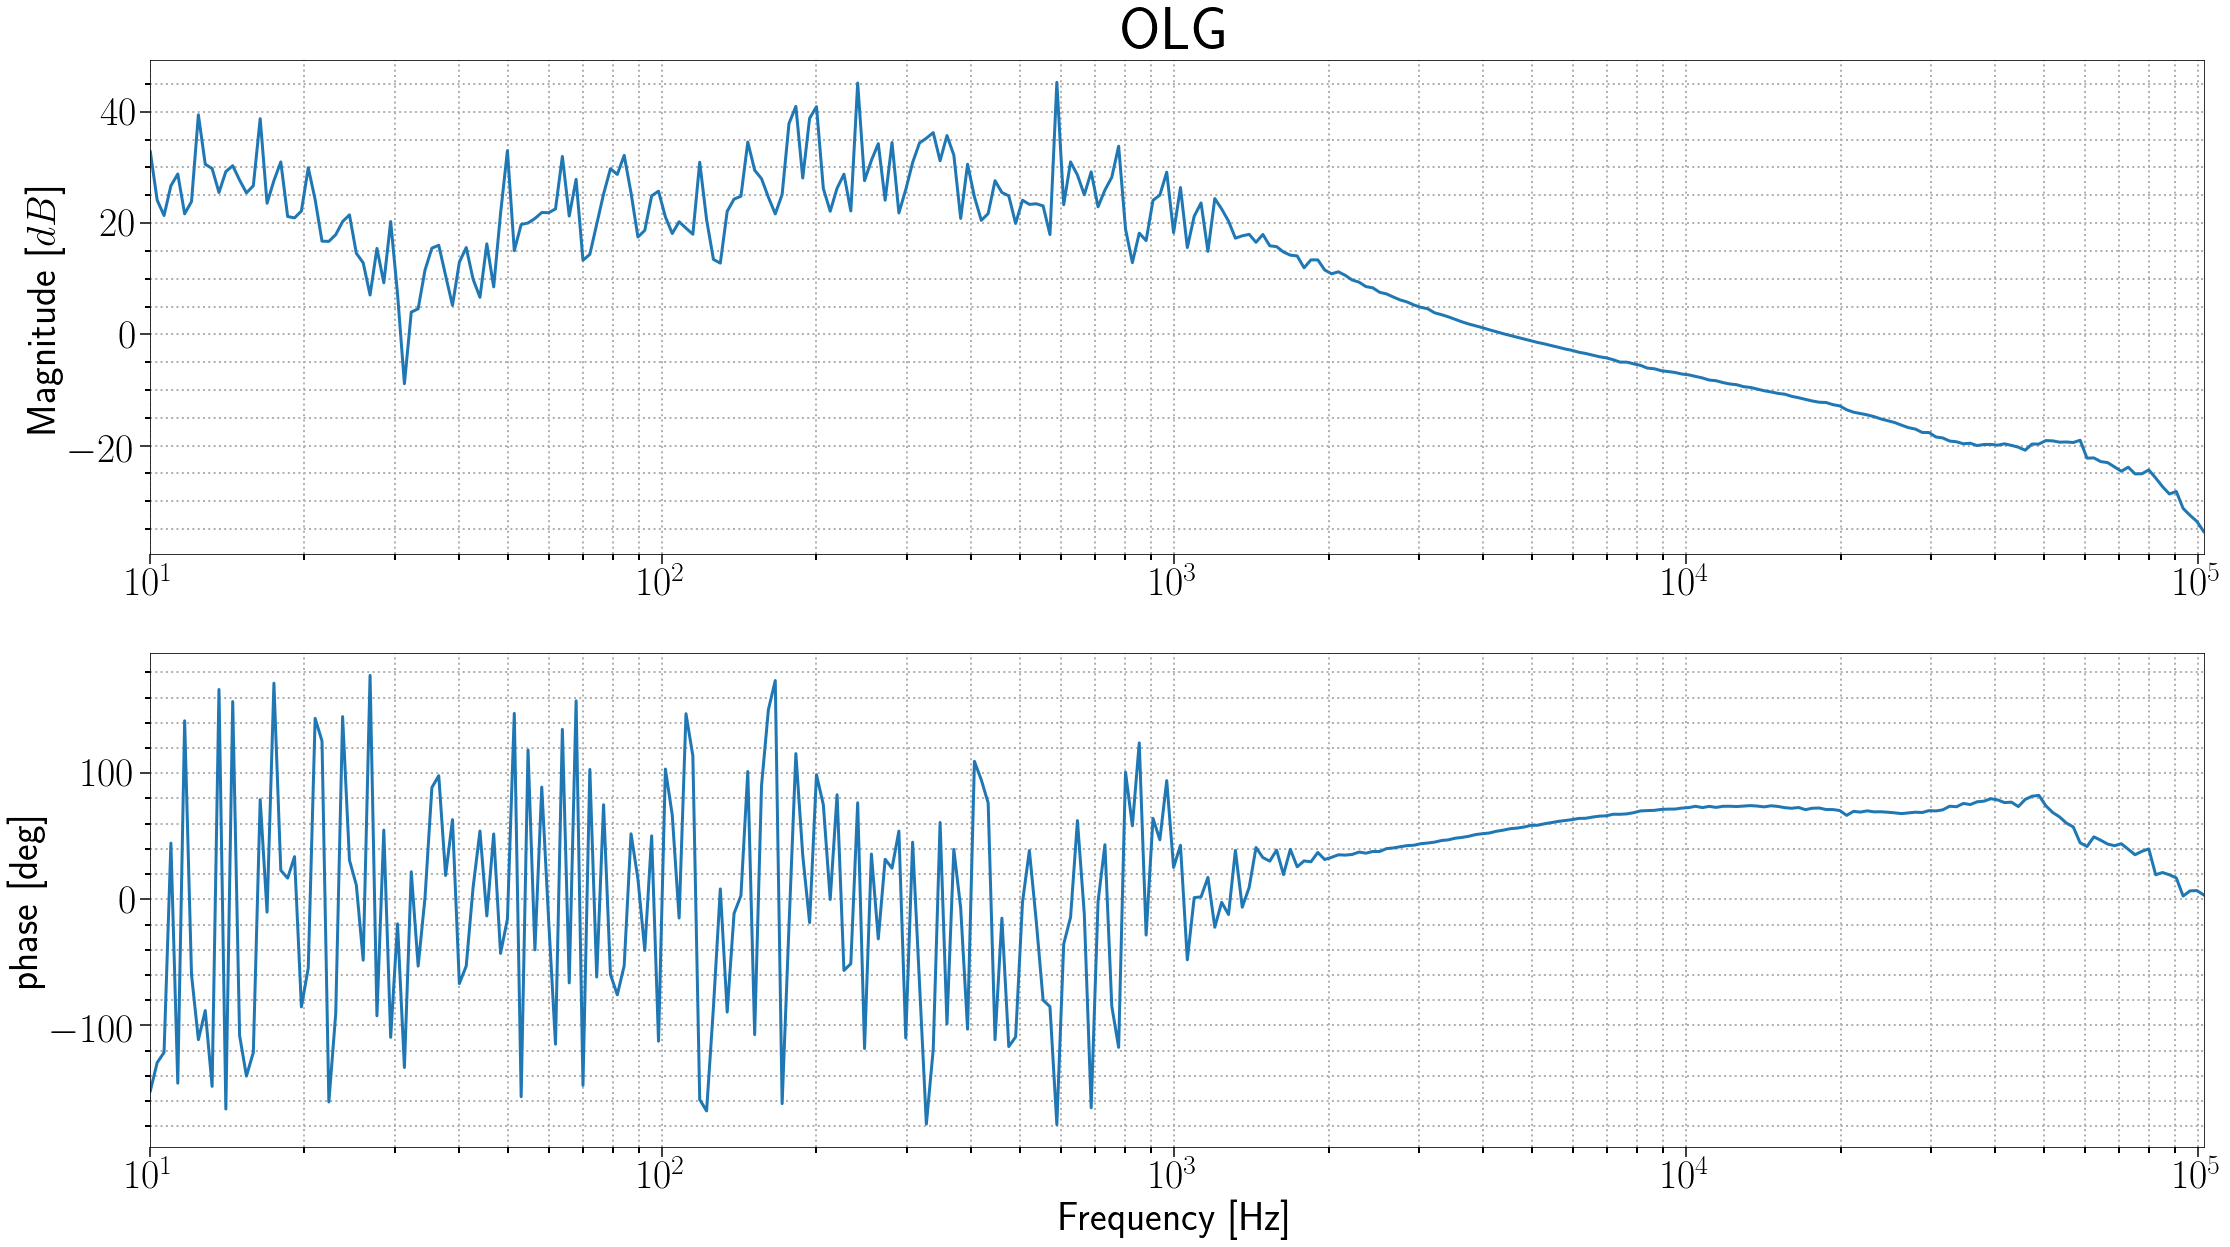

In [19]:
plt.subplot(211)
plt.semilogx(olgdb[:,0], olgdb[:,1])
plt.xlim(olgdb[0,0], olgdb[-1,0])
plt.ylabel('Magnitude [$dB$]')
plt.title("OLG")
plt.subplot(212)
plt.semilogx(olgdeg[:,0], olgdeg[:,1])
plt.xlim(olgdeg[0,0], olgdeg[-1,0])
plt.xlabel('Frequency [Hz]')
plt.ylabel('phase [deg]')

In [6]:
f = olgdb[:,0]
bb = 10**(olgdb[:,1]/20)* np.exp(1j*(olgdeg[:,1]/180)*np.pi)

Text(0, 0.5, 'phase [deg]')

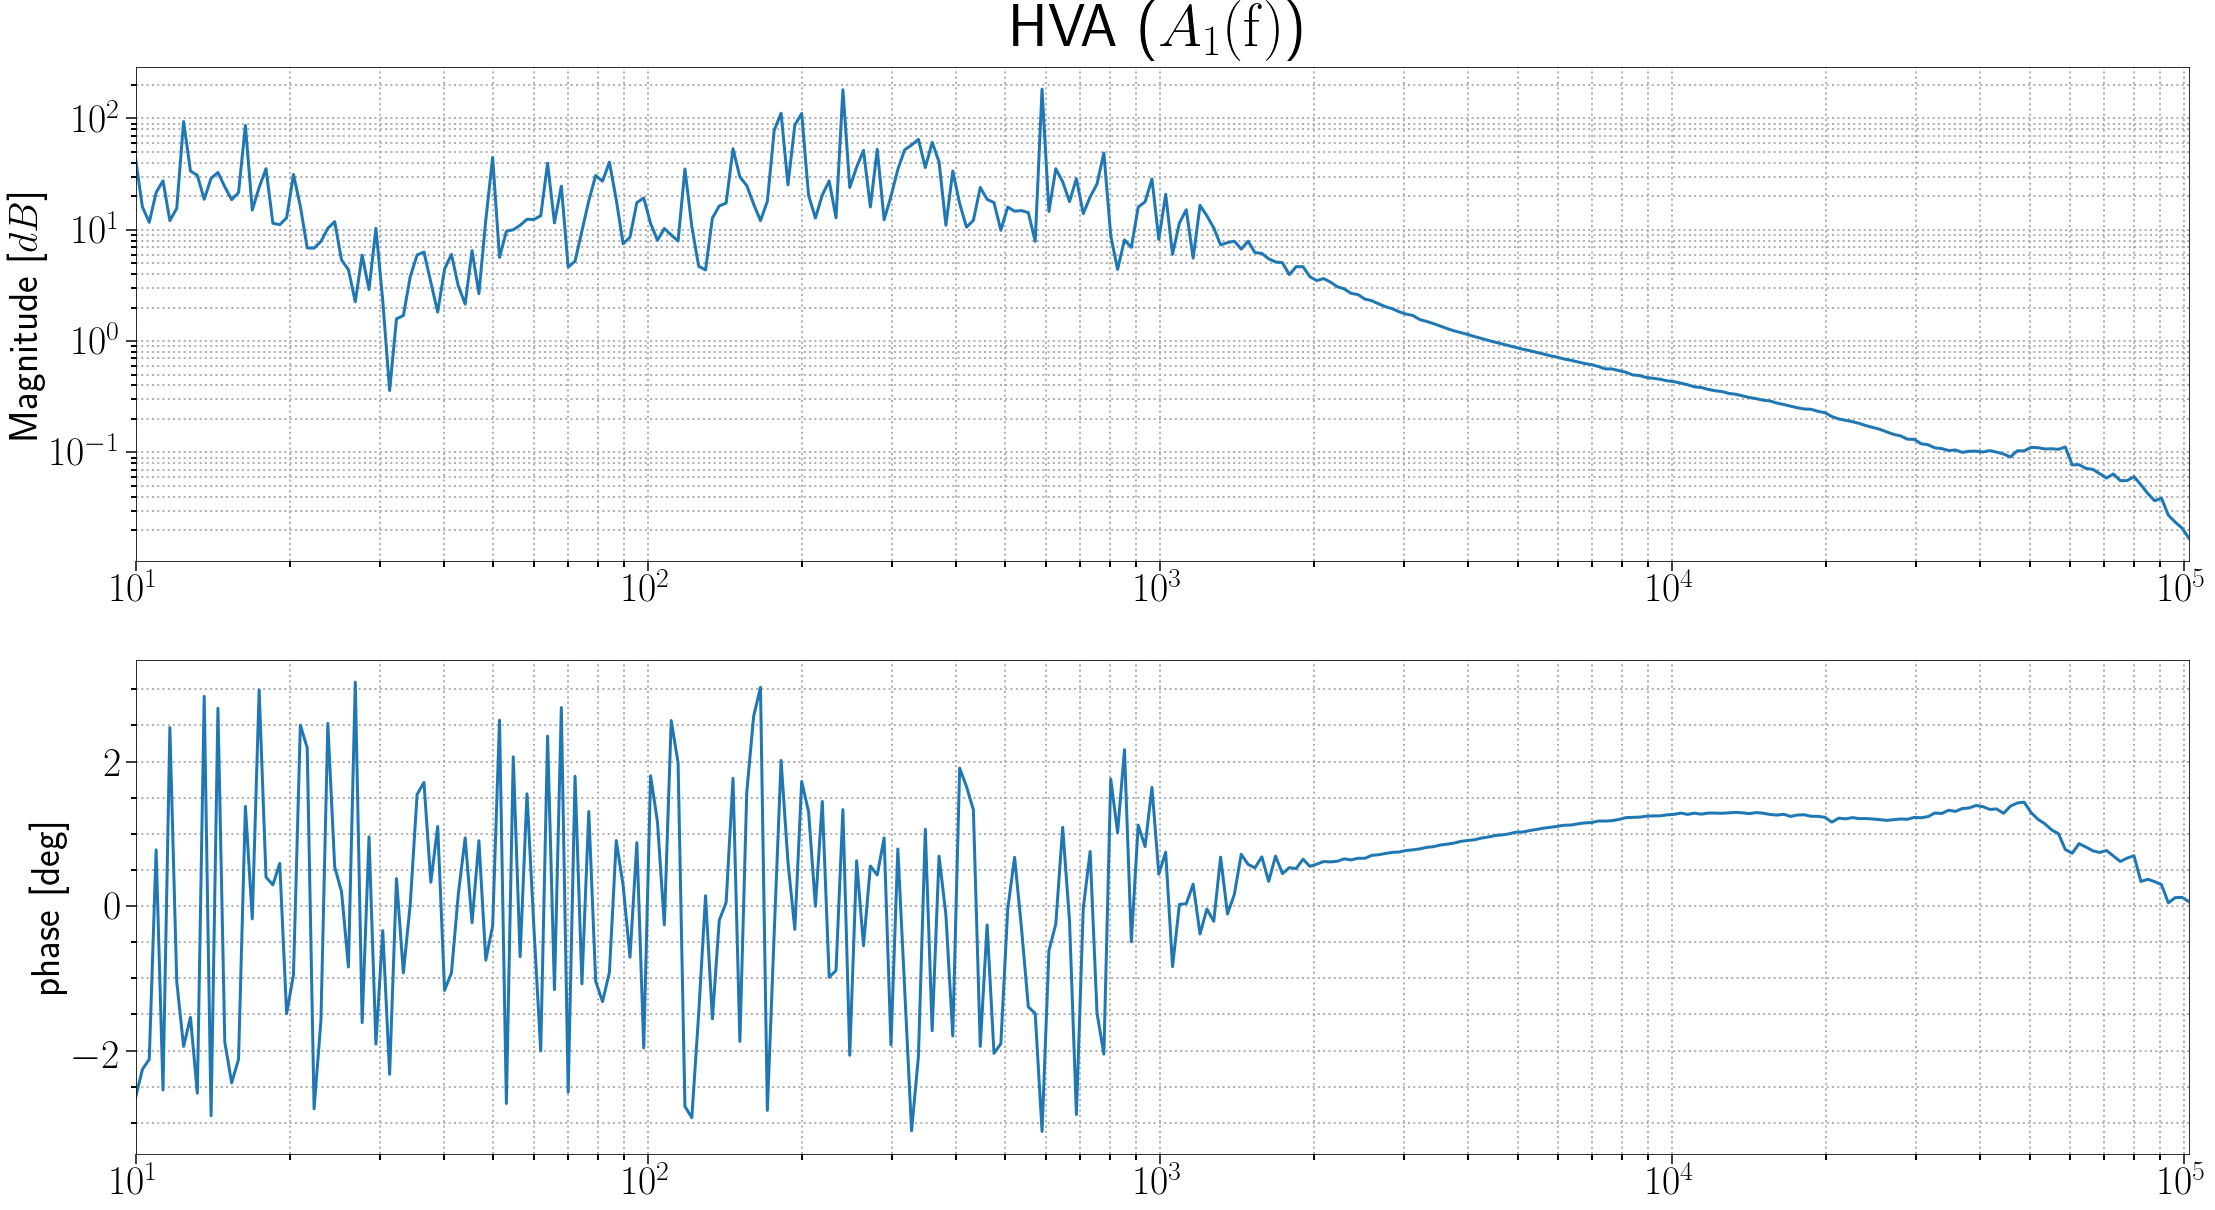

In [7]:
plt.subplot(211)
plt.loglog(f, np.abs(bb))
plt.xlim([f[0], f[-1]])
plt.ylabel('Magnitude [$dB$]')
plt.title("HVA ($A_1(\mathrm{f})$)")
plt.subplot(212)
plt.semilogx(f, np.angle(bb))
plt.xlim([f[0], f[-1]])
plt.ylabel('phase [deg]')

# HVA

Text(0, 0.5, 'phase [deg]')

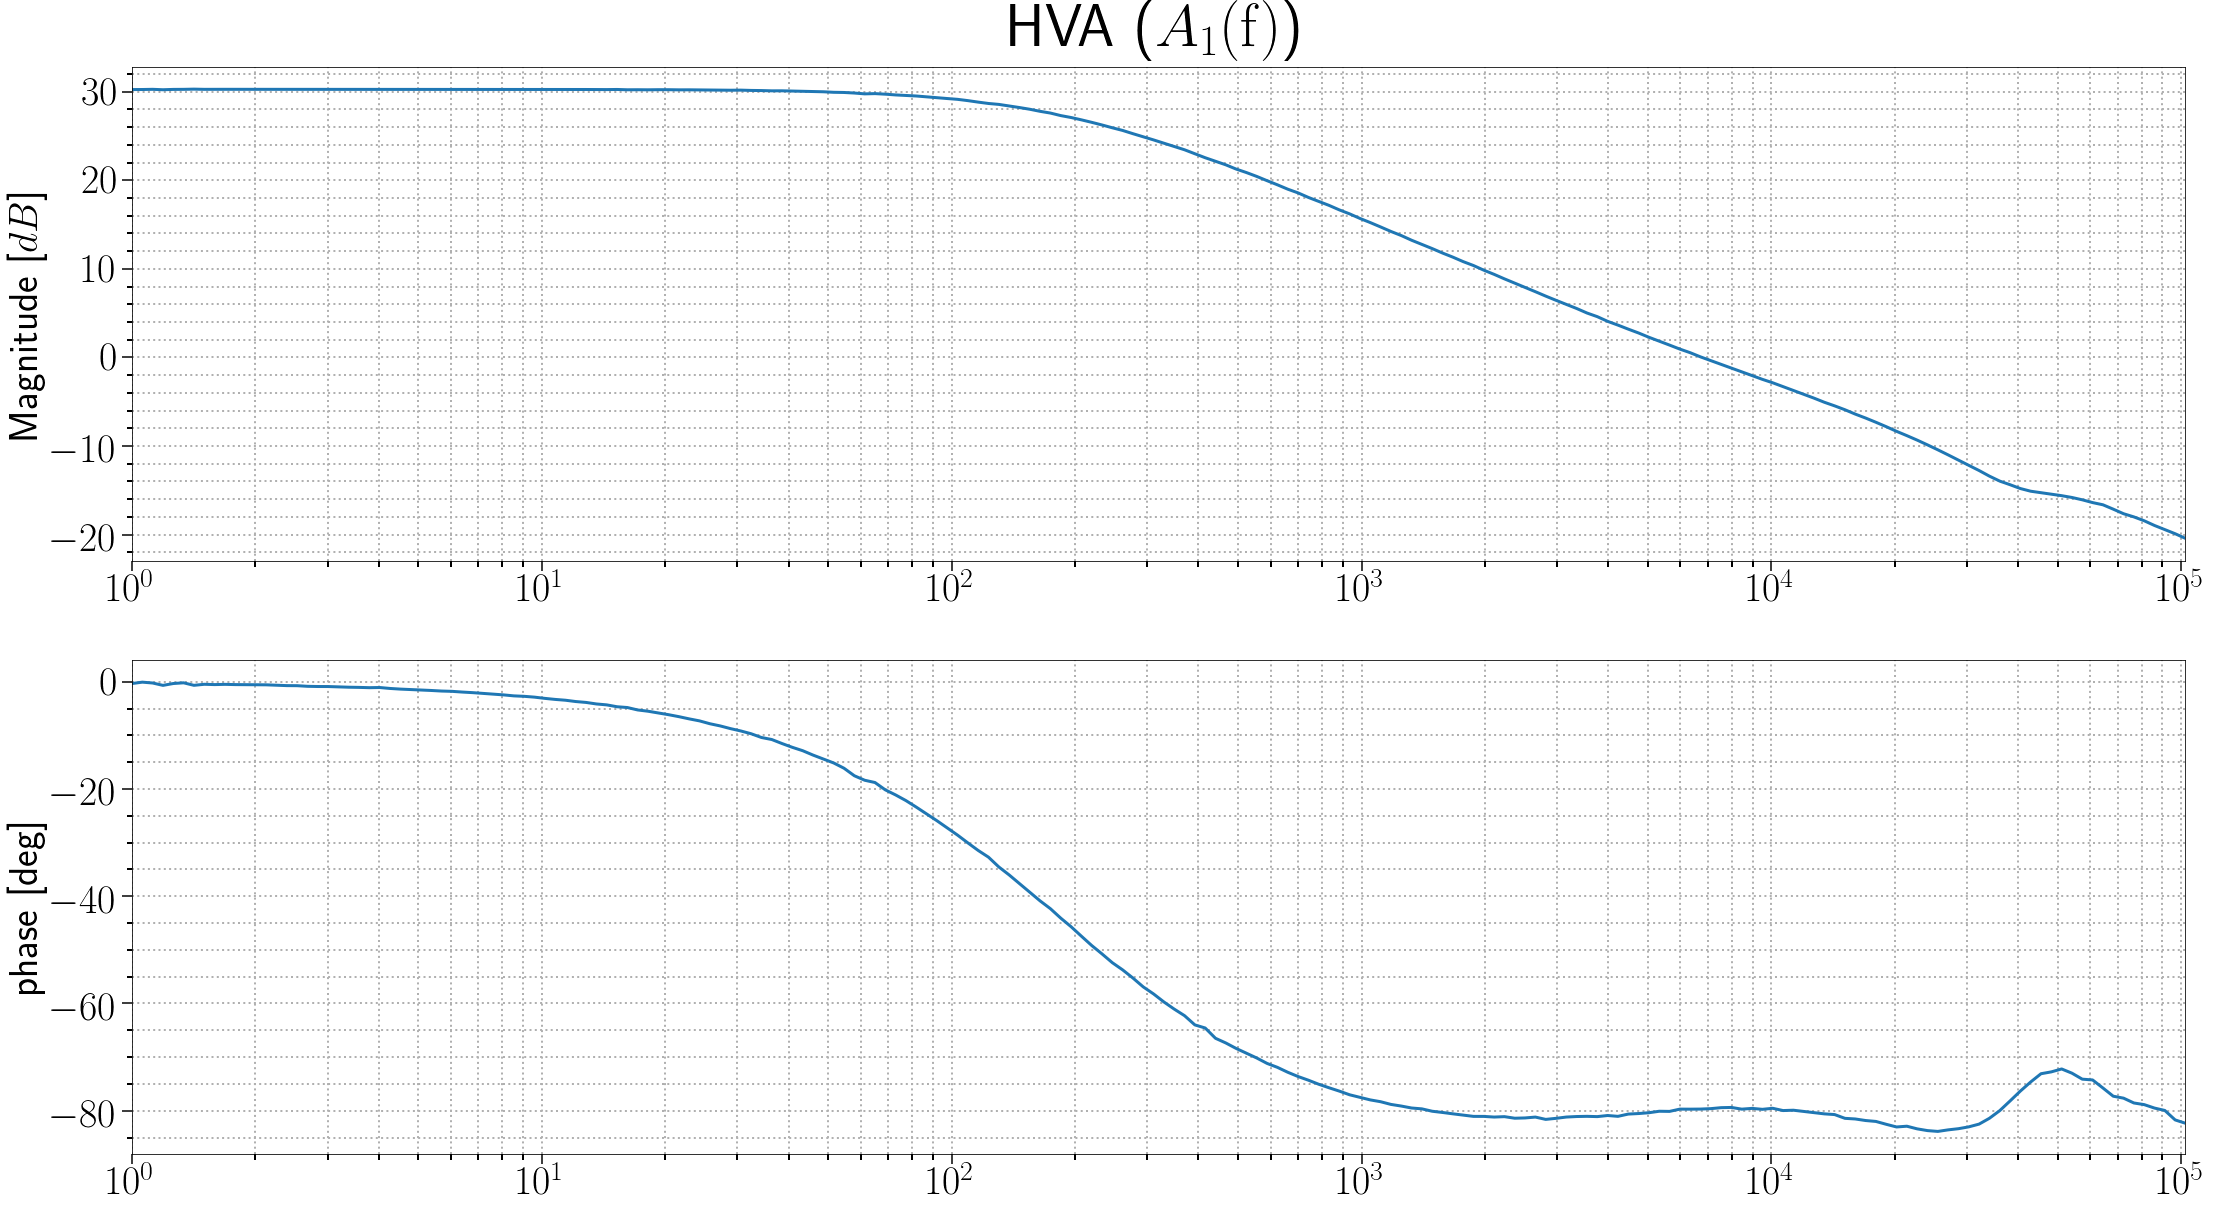

In [8]:
plt.subplot(211)
plt.semilogx(hvadb[:,0], hvadb[:,1])
plt.xlim(hvadb[0,0], hvadb[-1,0])
plt.ylabel('Magnitude [$dB$]')
plt.title("HVA ($A_1(\mathrm{f})$)")
plt.subplot(212)
plt.semilogx(hvadeg[:,0], hvadeg[:,1])
plt.xlim(hvadeg[0,0], hvadeg[-1,0])
plt.ylabel('phase [deg]')

In [9]:
ff = hvadb[:,0]
aa = 10**(hvadb[:,1]/20)* np.exp(1j*(hvadeg[:,1]/180)*np.pi)

Text(0, 0.5, 'phase [deg]')

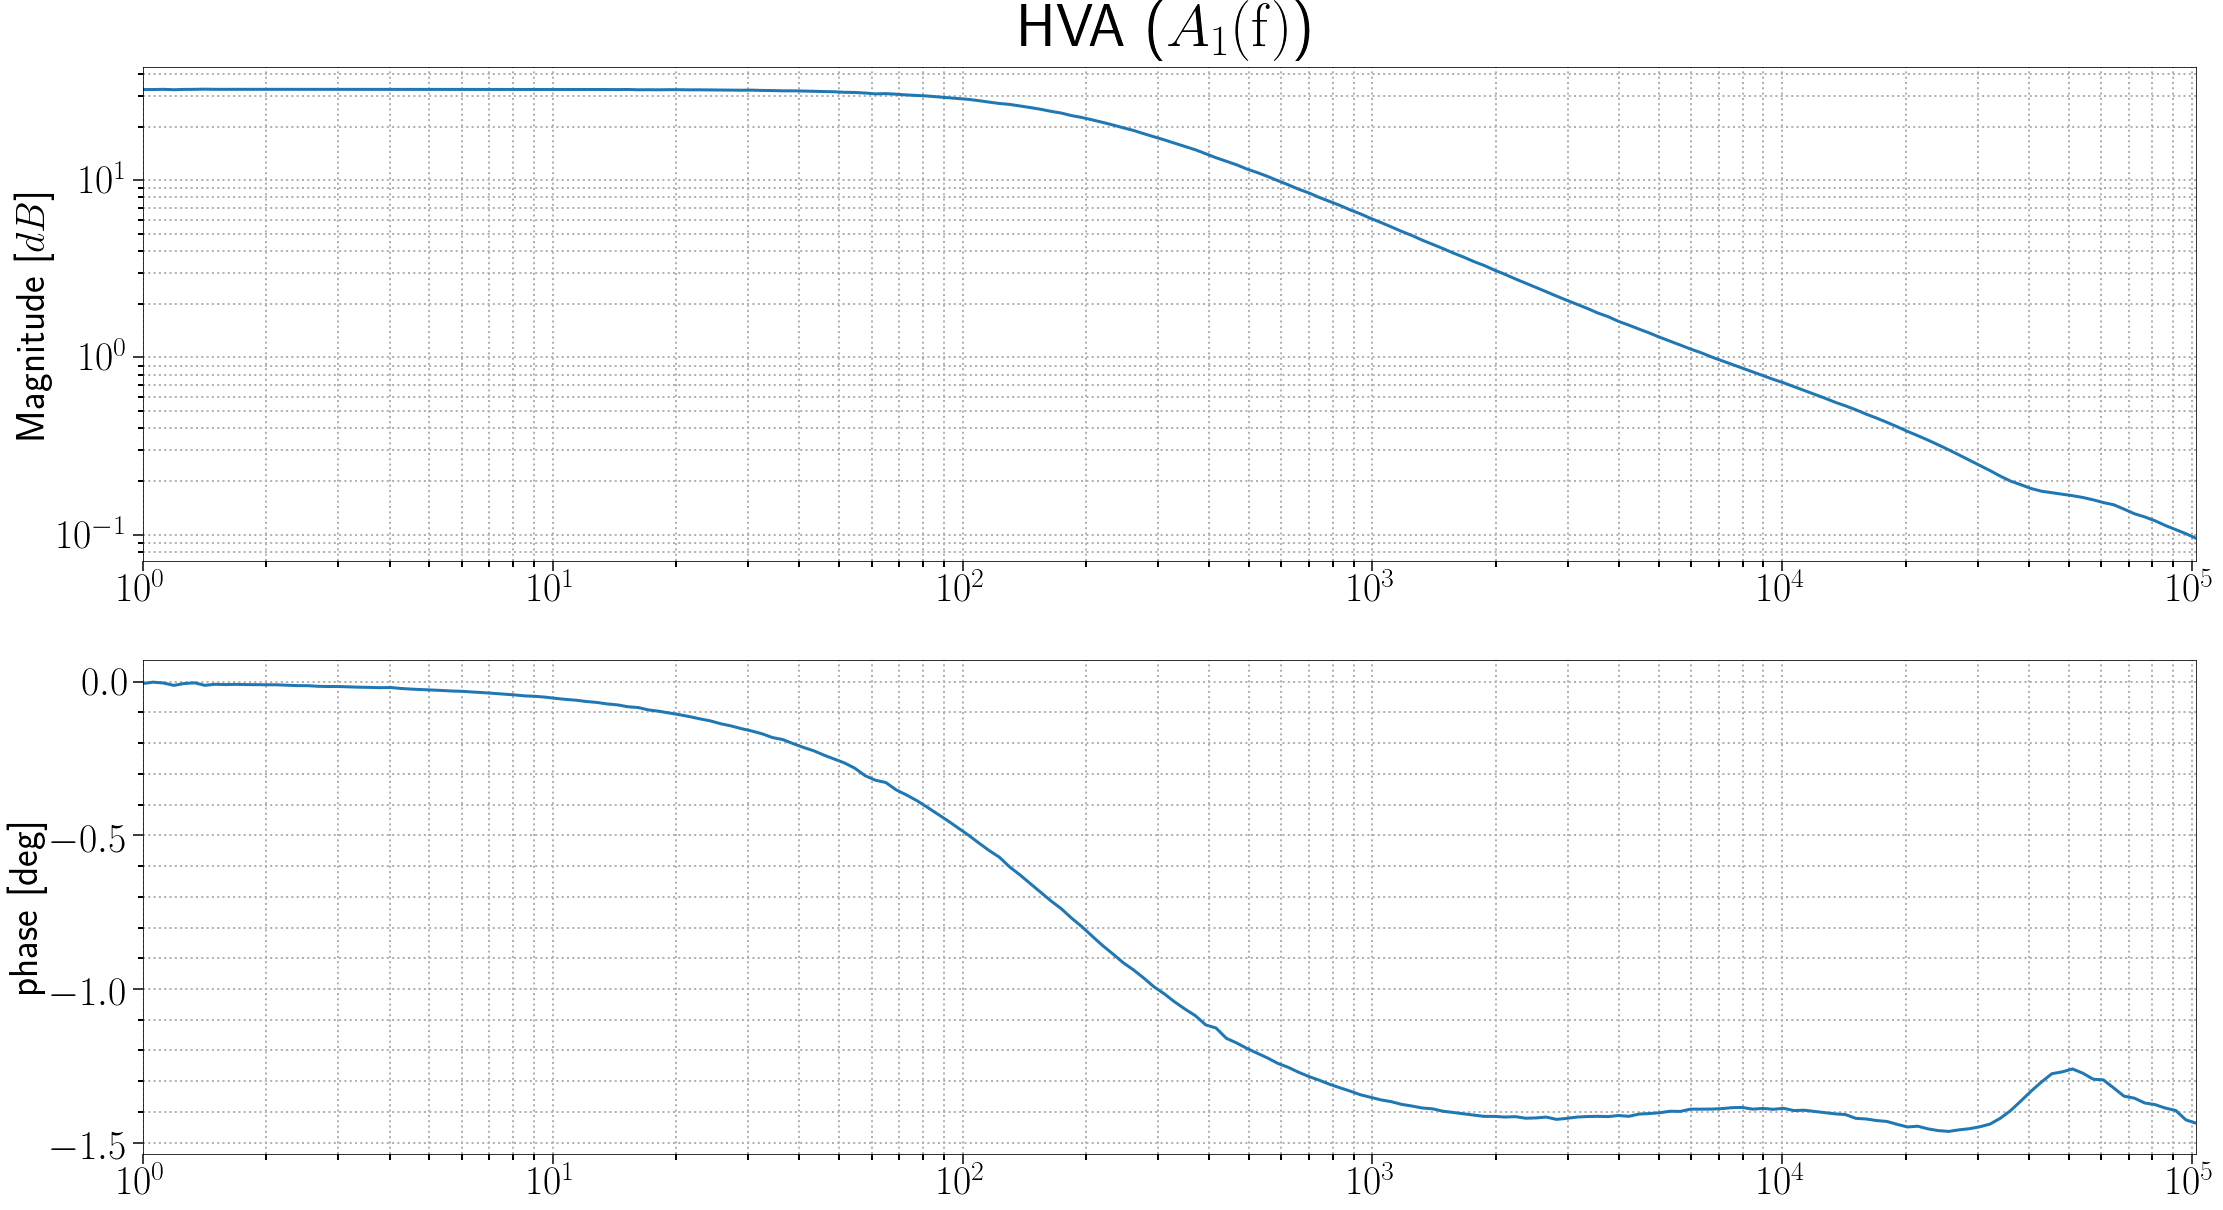

In [10]:
plt.subplot(211)
plt.loglog(ff, abs(aa))
plt.xlim(hvadb[0,0], hvadb[-1,0])
plt.ylabel('Magnitude [$dB$]')
plt.title("HVA ($A_1(\mathrm{f})$)")
plt.subplot(212)
plt.semilogx(ff, np.angle(aa))
plt.xlim(hvadeg[0,0], hvadeg[-1,0])
plt.ylabel('phase [deg]')

# FSS 

Text(0, 0.5, 'phase [deg]')

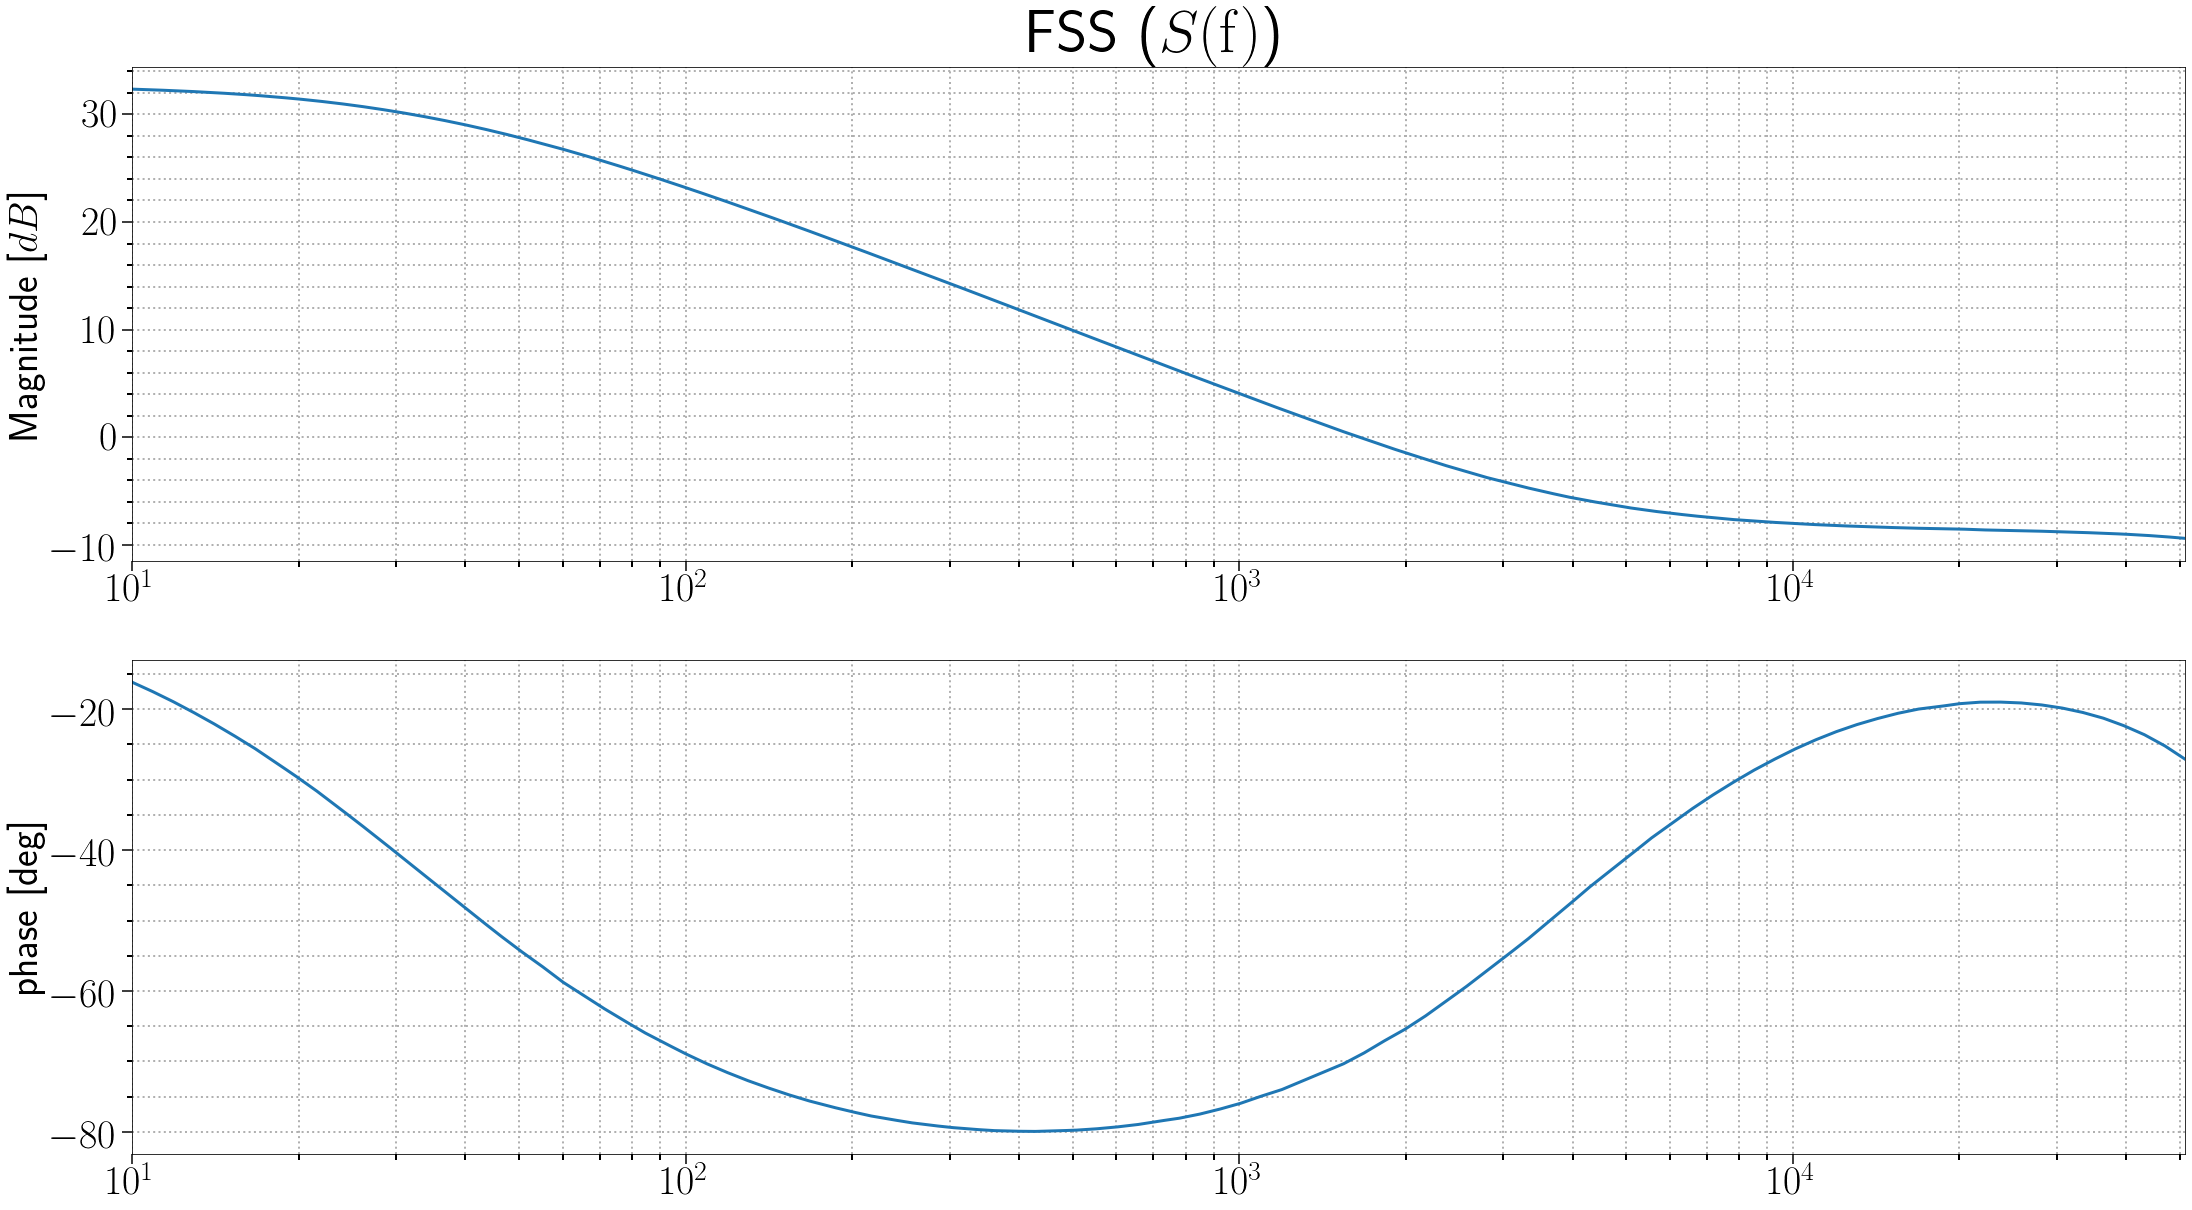

In [11]:
plt.subplot(211)
plt.semilogx(fssdb.frequency[:], fssdb.amplitude[:])
plt.xlim(fssdb.frequency[0], fssdb.frequency[-1])
plt.ylabel('Magnitude [$dB$]')
plt.title("FSS ($S(\mathrm{f})$)")
plt.subplot(212)
plt.semilogx(fssdeg.frequency[:], fssdeg.amplitude[:])
plt.xlim(fssdeg.frequency[0], fssdeg.frequency[-1])
plt.ylabel('phase [deg]')

In [12]:
fff = fssdb.frequency[:]
cc = 10**(fssdb.amplitude[:]/20)* np.exp(1j*(fssdeg.amplitude[:]/180)*np.pi)

<div class="alert-success">
<font size="6"> Interpolate all functions so that you have them on the same frequency axis </font>
</div>

In [13]:
laserV2Hz = 2.0e6                                            #Based on Measurement from Transverse mode spacing
a = np.interp(f, ff,aa)
c = np.interp(f, fff, cc)
aHzpV = laserV2Hz*a

# Total actuation function (HVA + Laser actuation)

Text(0.5, 1.0, 'Laser actuation freq response')

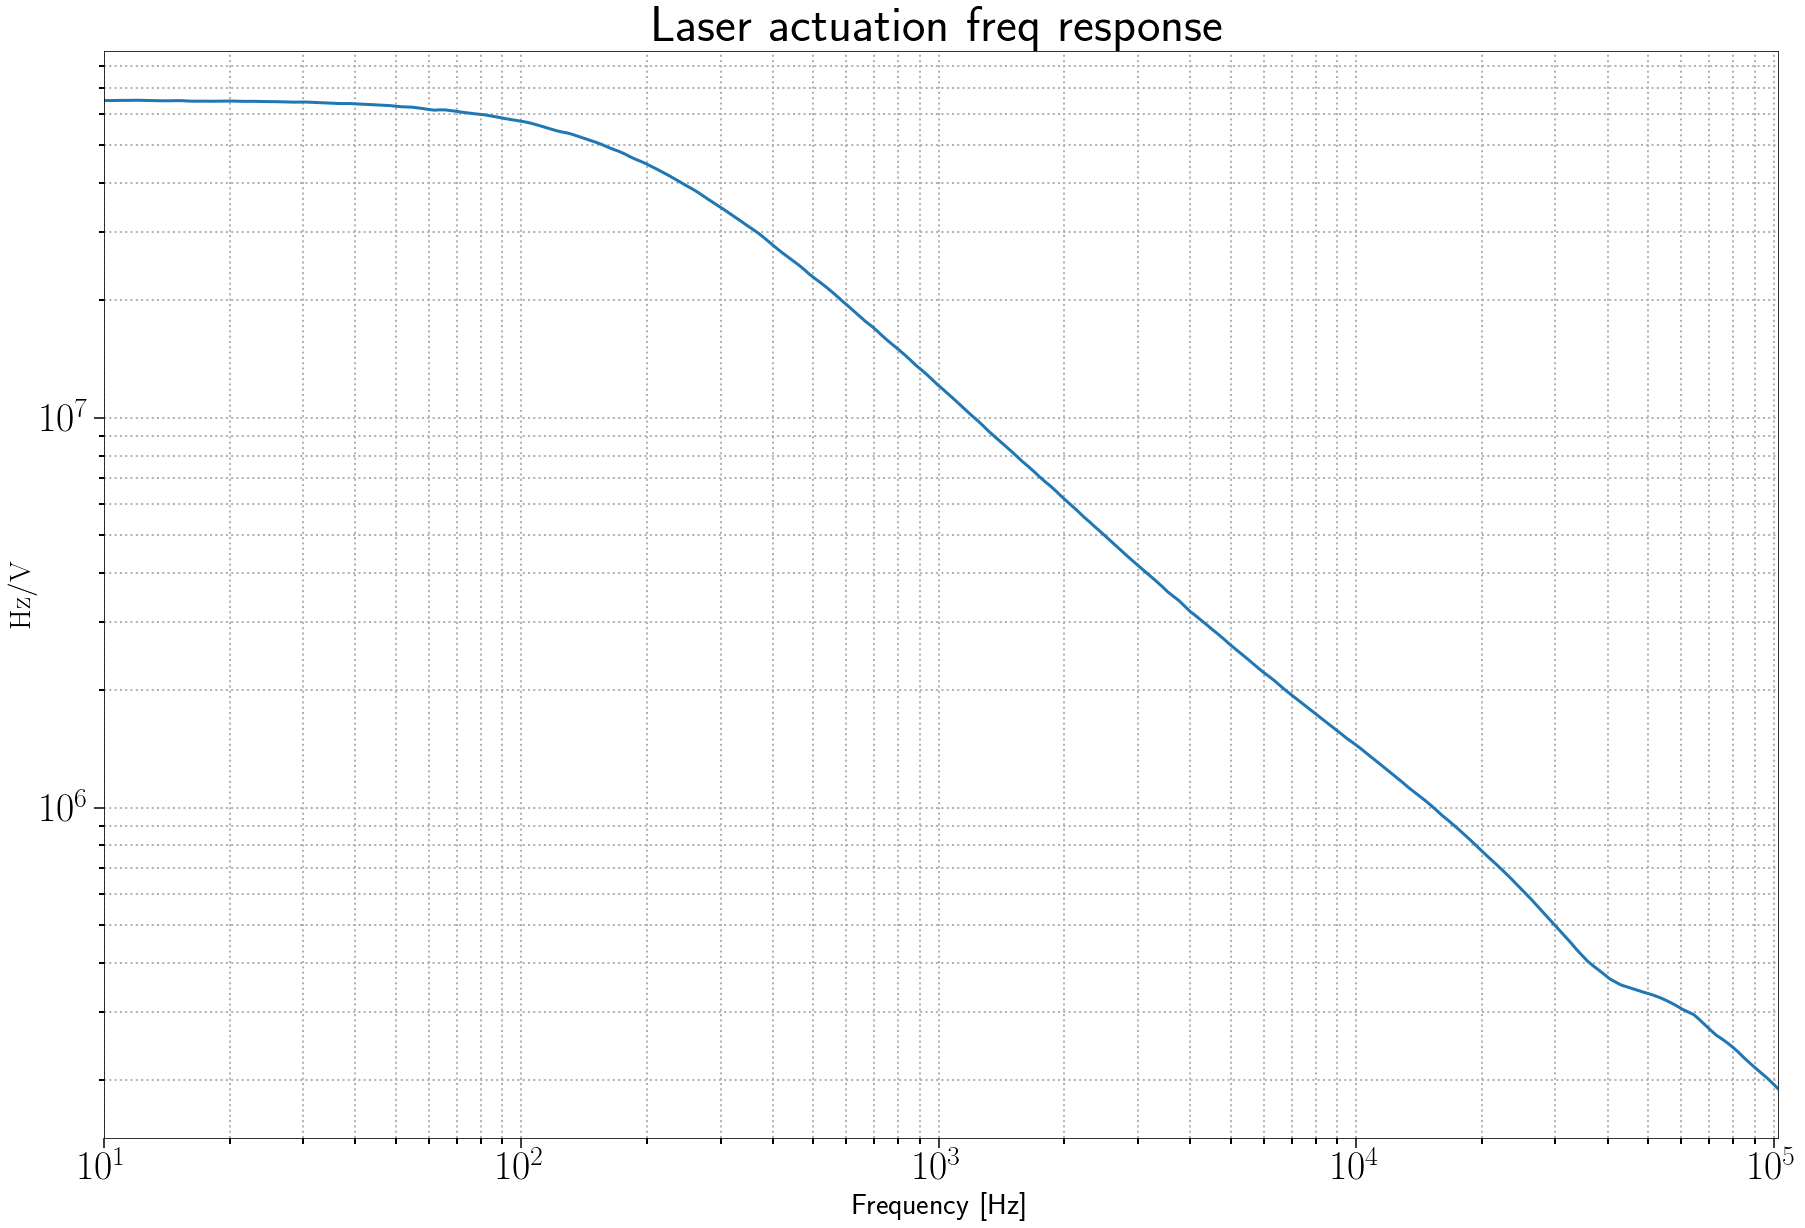

In [14]:
fig = plt.figure(figsize=(30,20))
plt.loglog(f,abs(aHzpV))
plt.xlim([f[0], f[-1]])
plt.xlabel('Frequency [Hz]',FontSize=30)
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$',FontSize=30)
plt.title("Laser actuation freq response", FontSize=50)

# Closed loop actuation

## Calibration function based on measured OLG $(H(\mathrm{f}))$ 

In [15]:
OLG = bb
CLG = 1/(1-OLG)
CAL1=OLG*CLG
CALVpHz=CAL1/aHzpV
CALHzpV = aHzpV/CAL1

## Calibration function based on $H(\mathrm{f}) = S(\mathrm{f})*A(\mathrm{f})$

In [16]:
if compareOLG == True:
    OLG2 = a*c
    CLG2 = 1/(1-OLG2)
    CAL2 = OLG2*CLG2
    CALVpHz2 = CAL2/aHzpV
    CALHzpV2 = aHzpV/CAL2

In [ ]:
plt.subplot(211)
plt.loglog(f,abs(OLG2), label = '$S(\mathrm{f})*H(\mathrm{f})$')
plt.xlim([f[0],f[-1]])
#plt.loglog(f,(abs(a) + abs(c))/(1 + (abs(a) + abs(c))))
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$')
plt.title("Loop calibration function $[(OLG)/(1-OLG)]$")
plt.legend()
plt.subplot(212)
plt.semilogx(f, np.unwrap(np.angle(CAL1, deg= True)), label= 'OLG measured')
plt.semilogx(f,np.angle(OLG2), deg= True), label = '$S(\mathrm{f})*H(\mathrm{f})$')
plt.xlim([f[0], f[-1]])
plt.xlabel('Frequency [Hz]')
plt.legend()

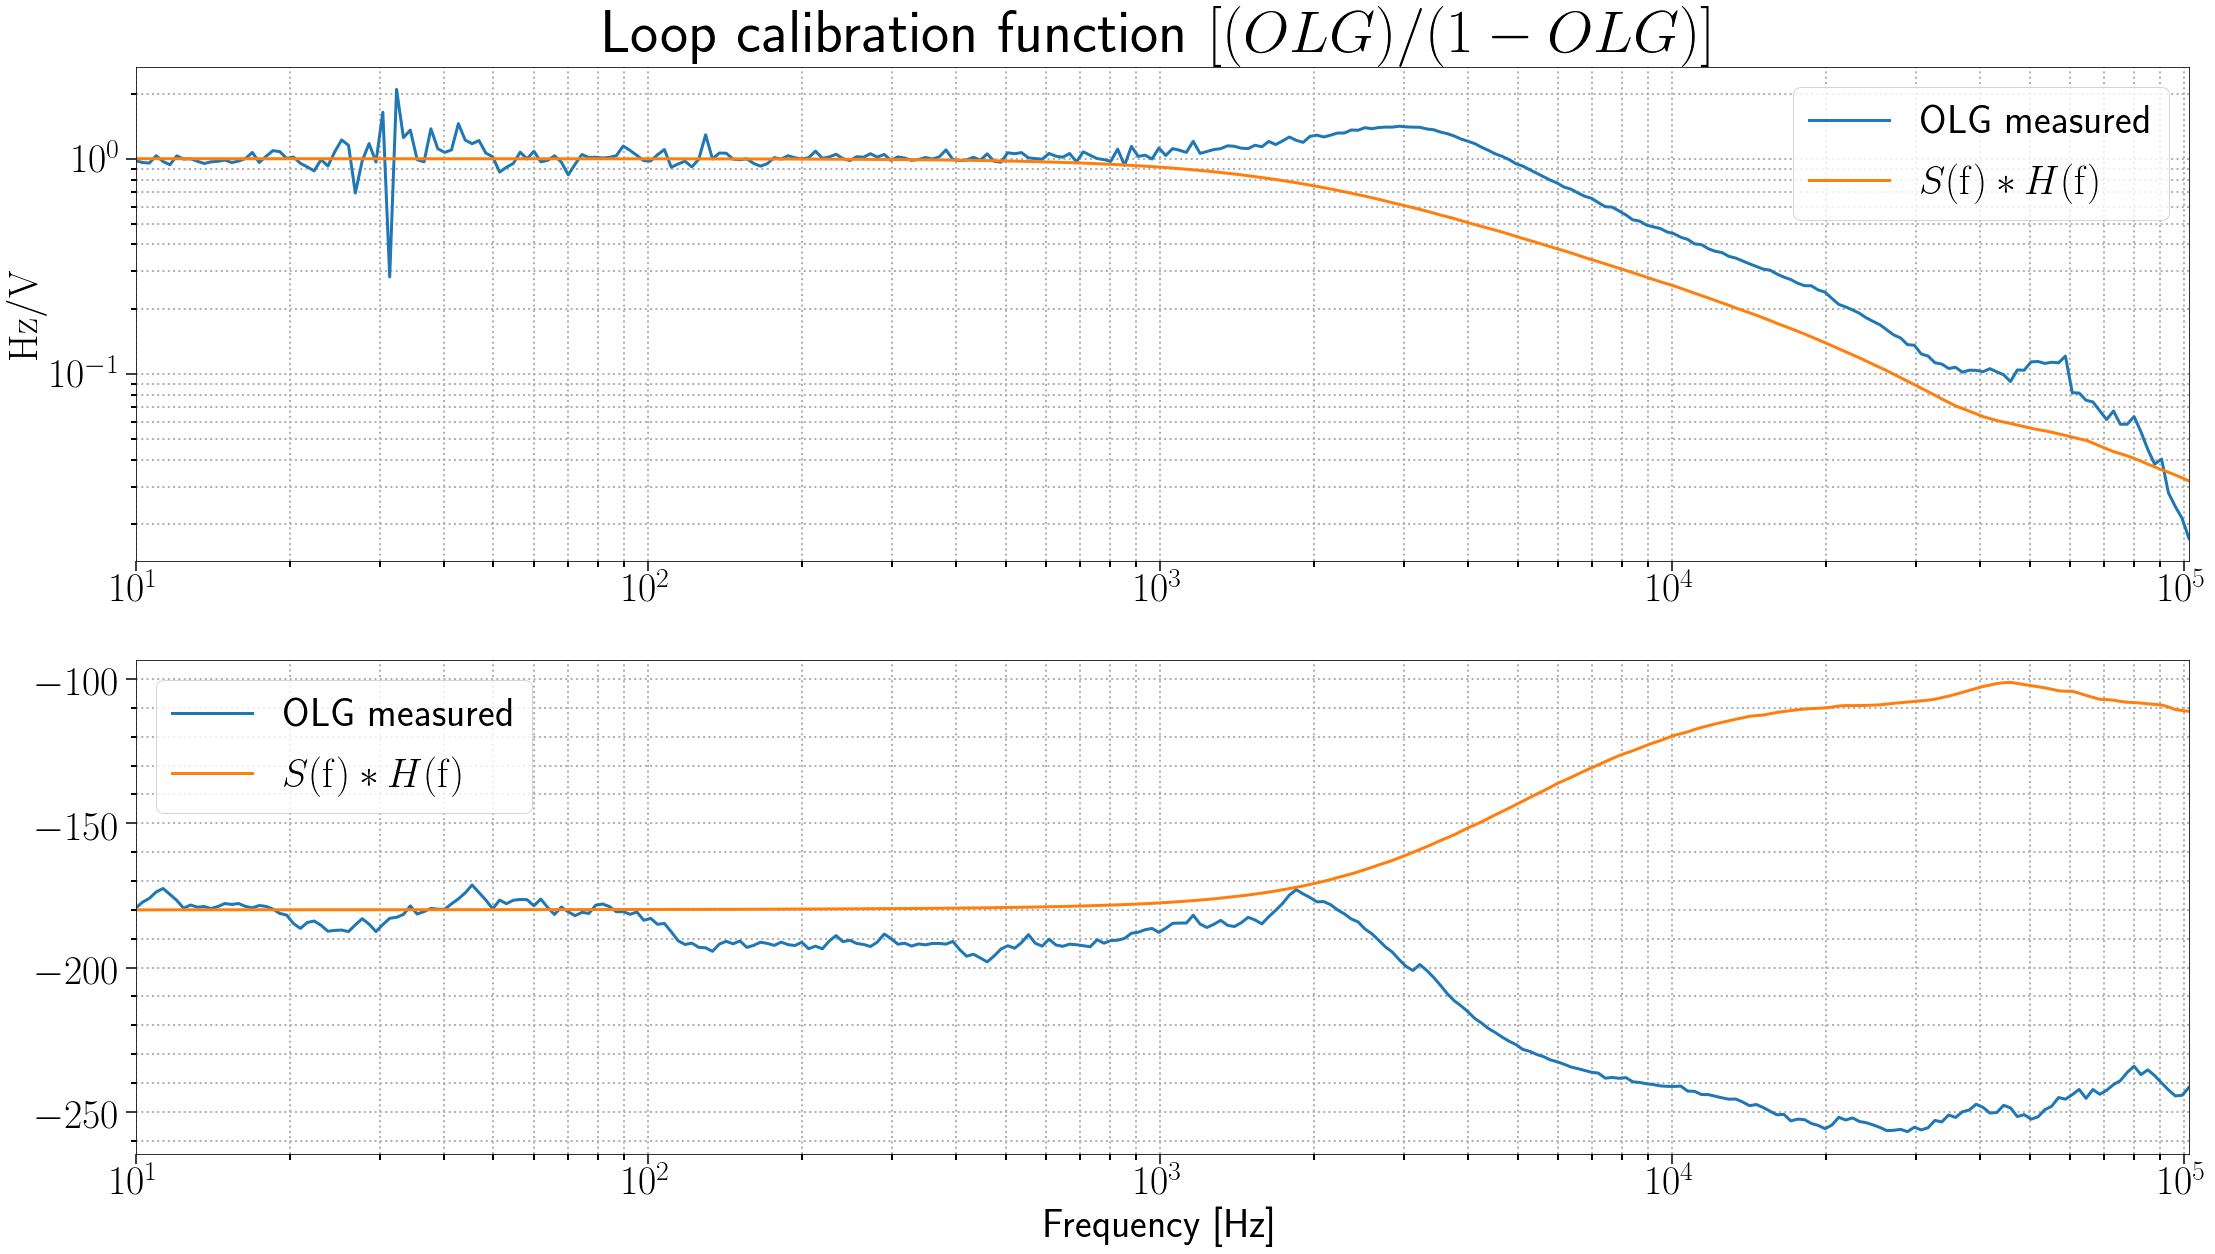

In [17]:
plt.subplot(211)
plt.loglog(f,abs(CAL1), label = 'OLG measured')
if compareOLG == True:
    plt.loglog(f,abs(CAL2), label = '$S(\mathrm{f})*H(\mathrm{f})$')
plt.xlim([f[0],f[-1]])
#plt.loglog(f,(abs(a) + abs(c))/(1 + (abs(a) + abs(c))))
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$')
plt.title("Loop calibration function $[(OLG)/(1-OLG)]$")
plt.legend()
plt.subplot(212)
plt.semilogx(f, np.unwrap(np.angle(CAL1, deg= True)), label= 'OLG measured')
if compareOLG == True:
    plt.semilogx(f,np.angle(CAL2, deg= True), label = '$S(\mathrm{f})*H(\mathrm{f})$')
plt.xlim([f[0], f[-1]])
plt.xlabel('Frequency [Hz]')
plt.legend()

# Hz/V Calibration

In [49]:
fn = noise[:,0]

In [52]:
cal = np.interp(fn,f, CALHzpV)
if compareOLG == 1:
    cal2 = np.interp(fn,f, CALHzpV2)

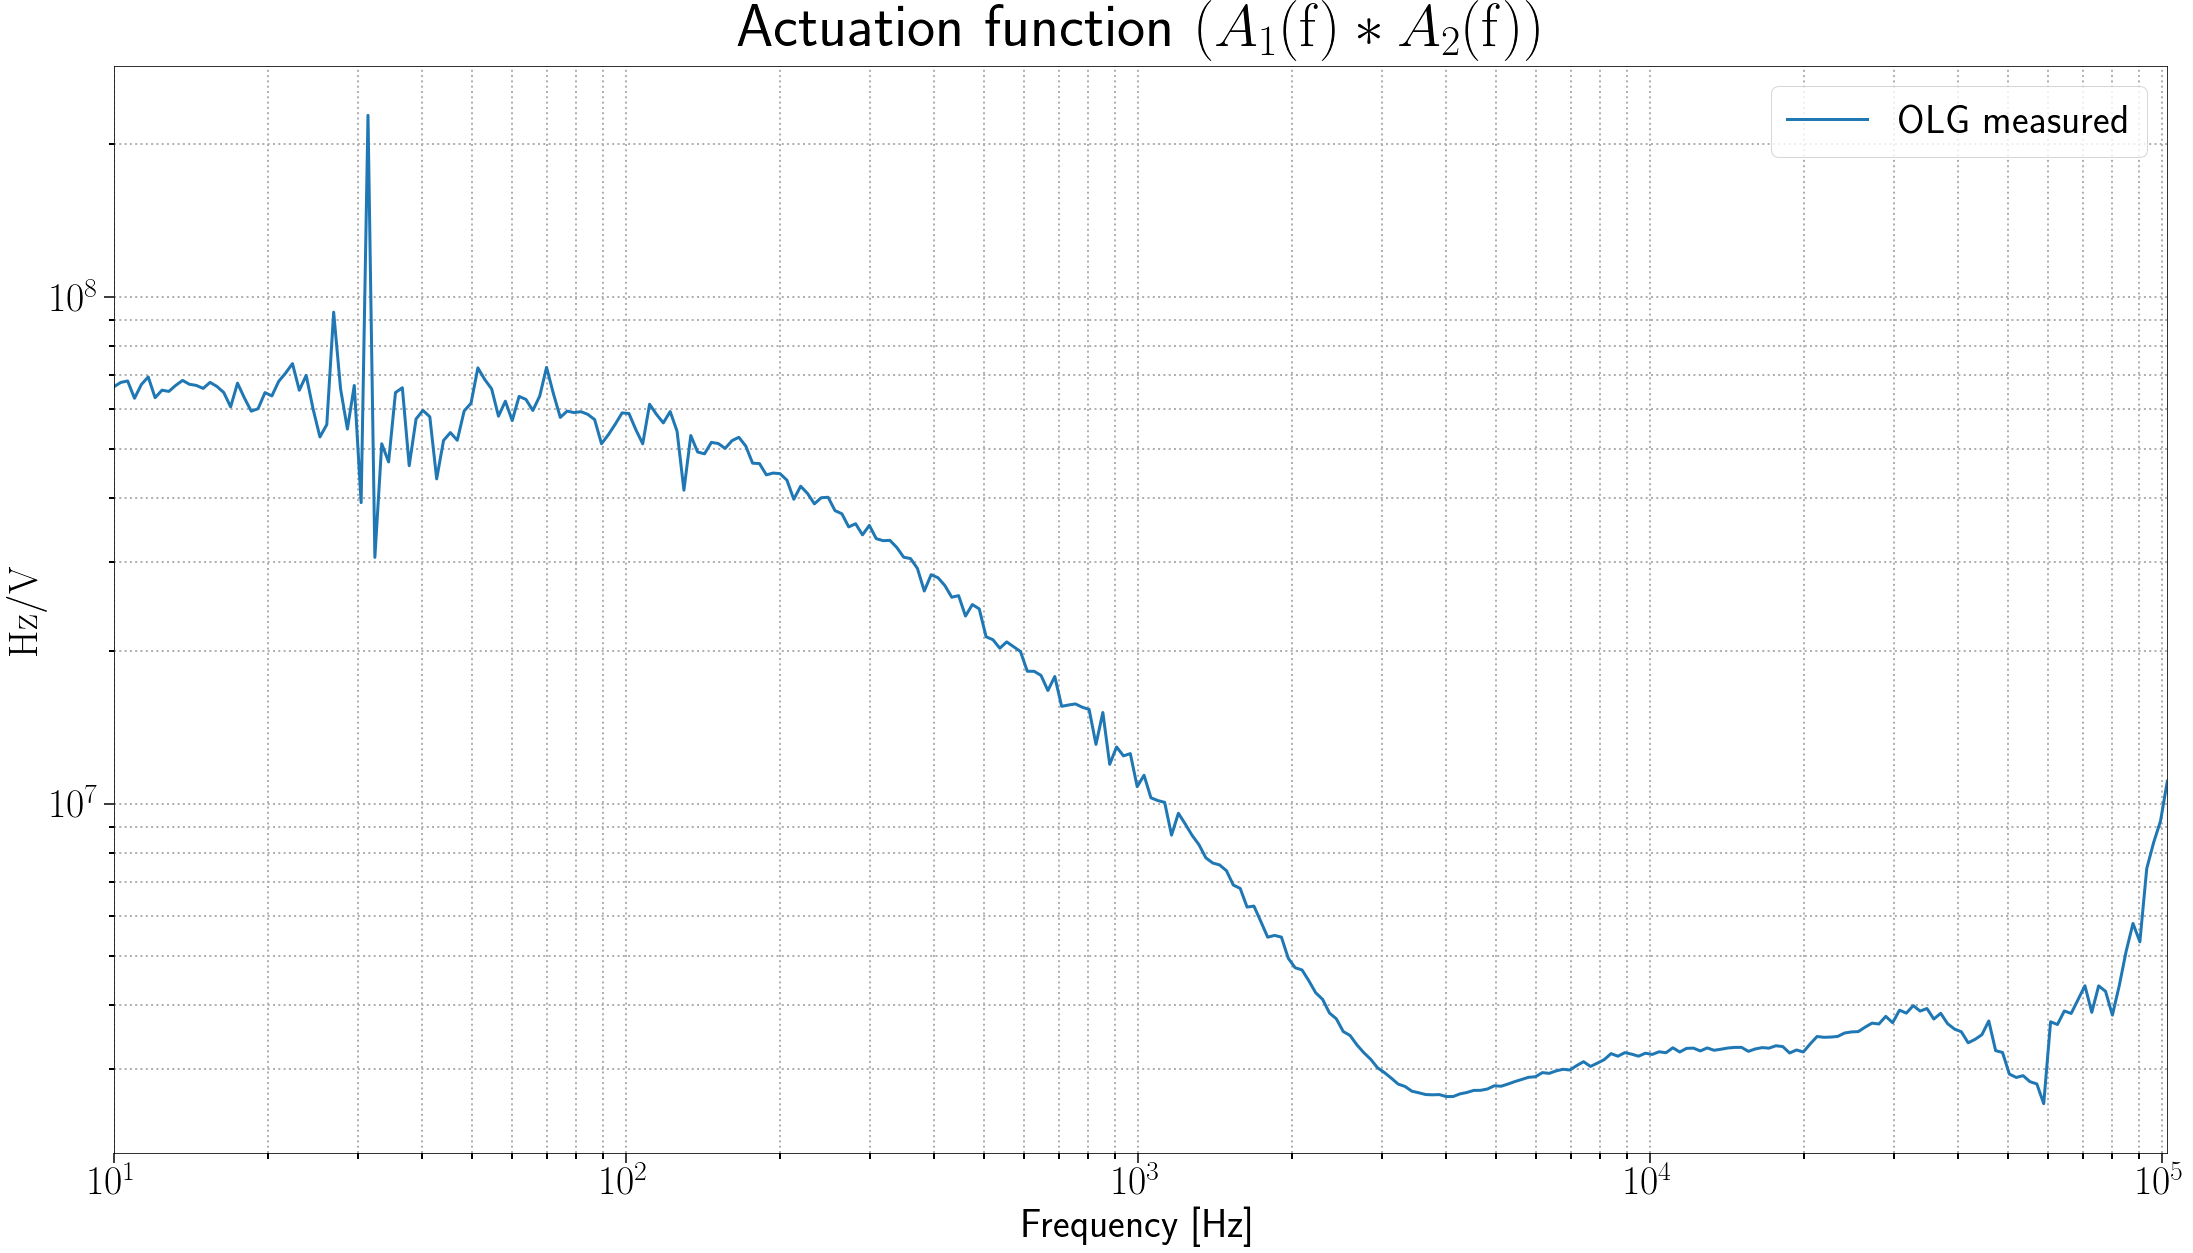

In [53]:
plt.loglog(f,abs(CALHzpV), label='OLG measured')
if compareOLG == True:
    plt.loglog(f, abs(CALHzpV2), label='$H(\mathrm{f})*S(\mathrm{f})$')
plt.xlim([f[0], f[-1]])
plt.xlabel('Frequency [Hz]')
plt.ylabel('$$\mathrm{Hz}/\mathrm{V}$$')
plt.title("Actuation function $(A_1(\mathrm{f}) * A_2(\mathrm{f}))$")
plt.legend()

# Voltage spectra

## $V_{rms} / \sqrt{Hz}$

Text(0.5, 1.0, 'Measured voltage noise between FSS and HVA')

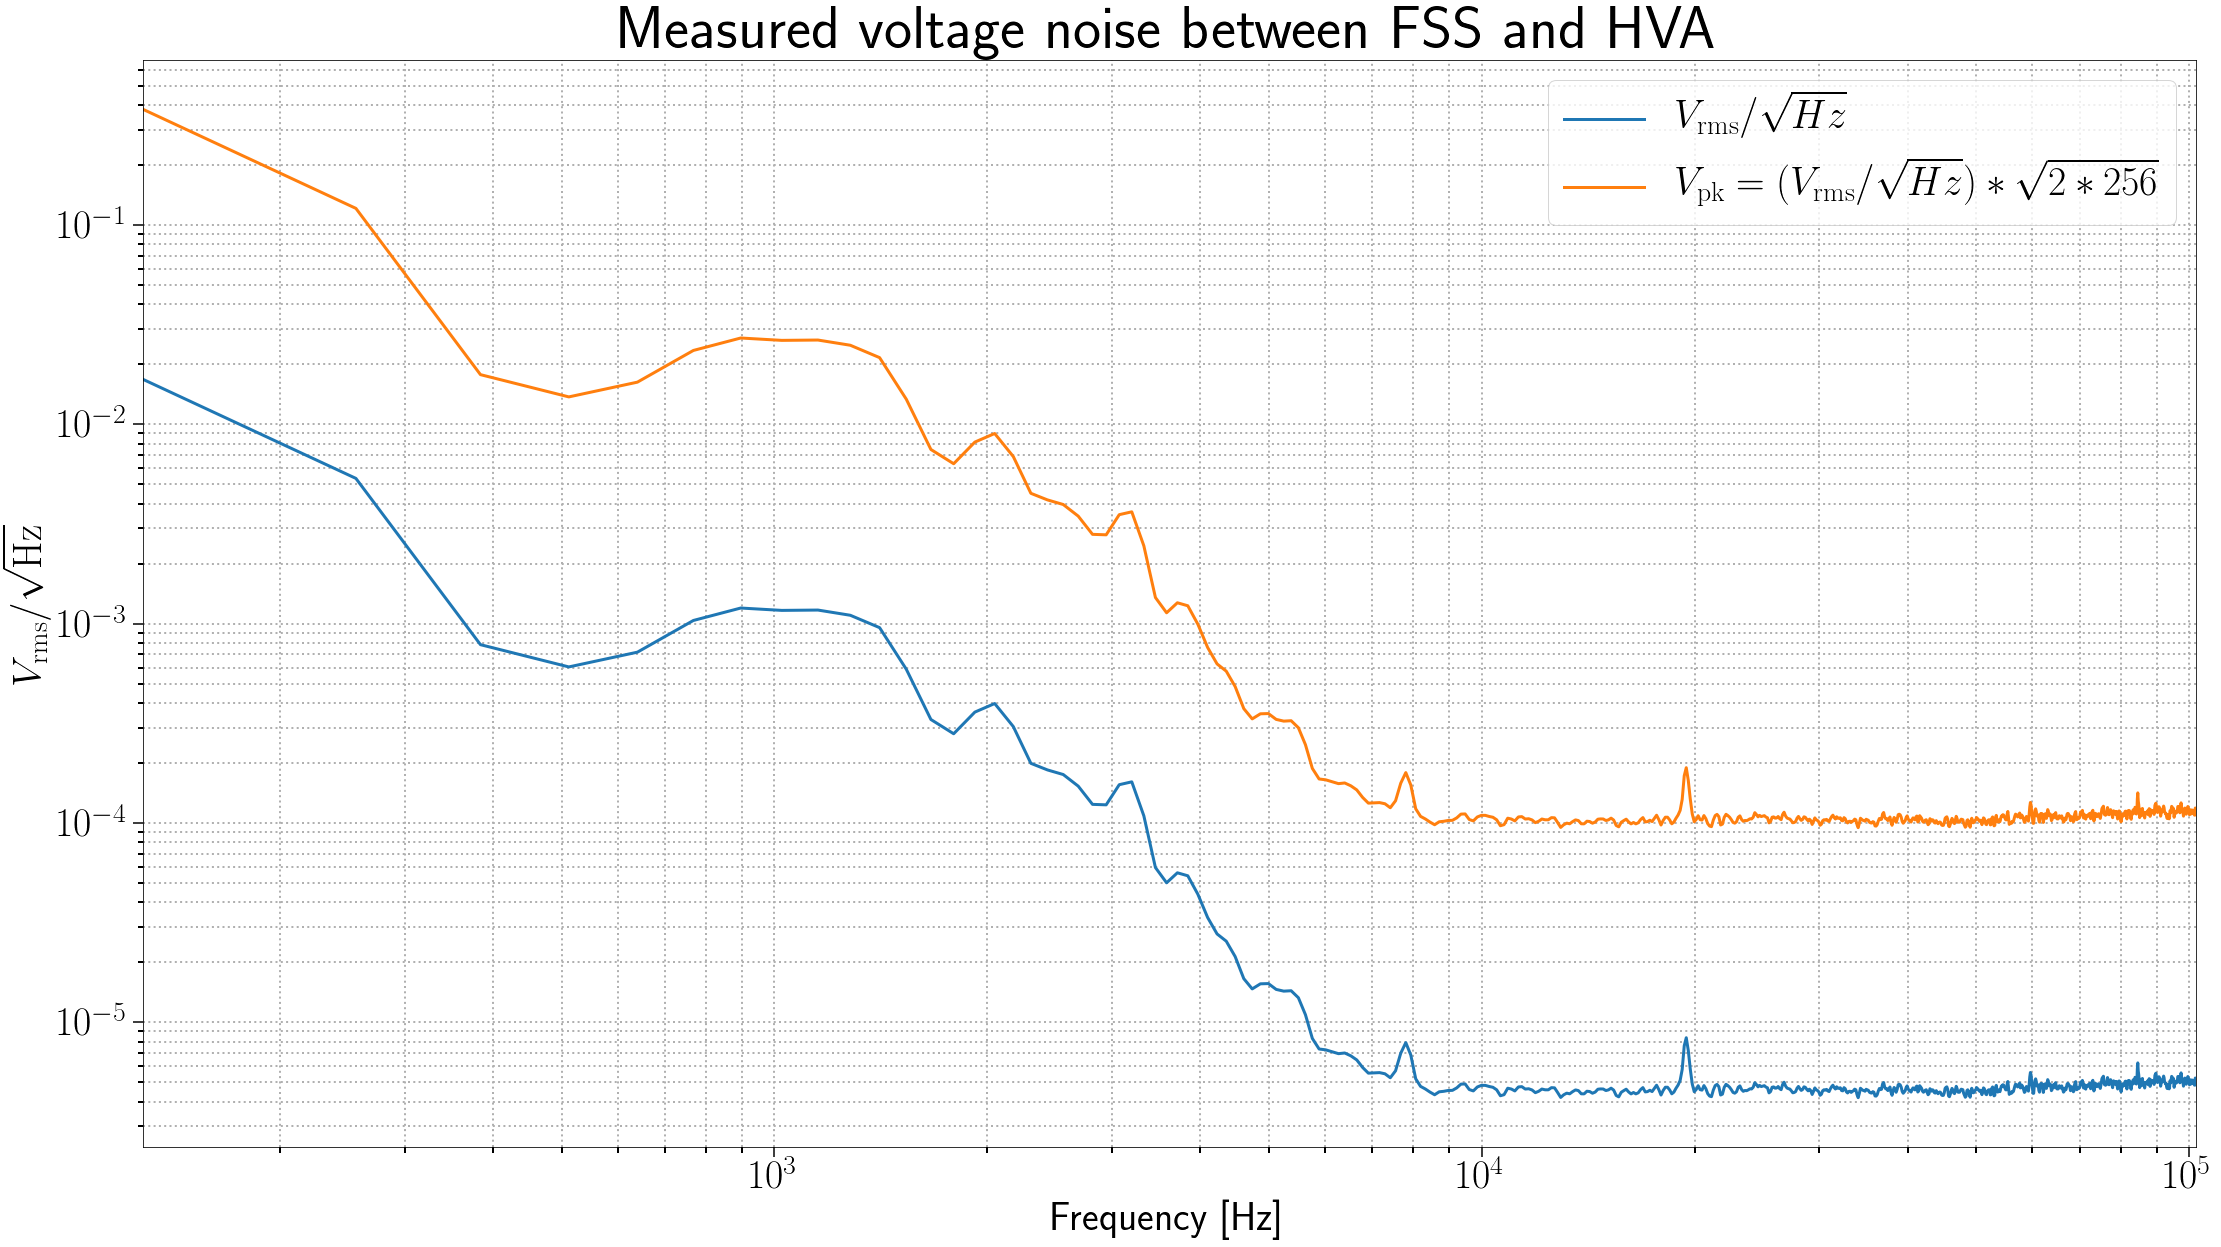

In [54]:
plt.loglog(fn,noise[:,1],label = '$V_\mathrm{rms}/\sqrt{Hz}$')
plt.loglog(fn,noise[:,1]*np.sqrt(2*256),label='$V_\mathrm{pk}=(V_\mathrm{rms}/\sqrt{Hz})*\sqrt{2*256}$')
plt.xlim([fn[0], fn[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('$$V_{\mathrm{rms}}/\sqrt{\mathrm{Hz}}$$')
plt.title("Measured voltage noise between FSS and HVA")

## $V_{pk}$

Text(0.5, 1.0, 'Measured voltage between FSS and HVA ($V_{out}$)')

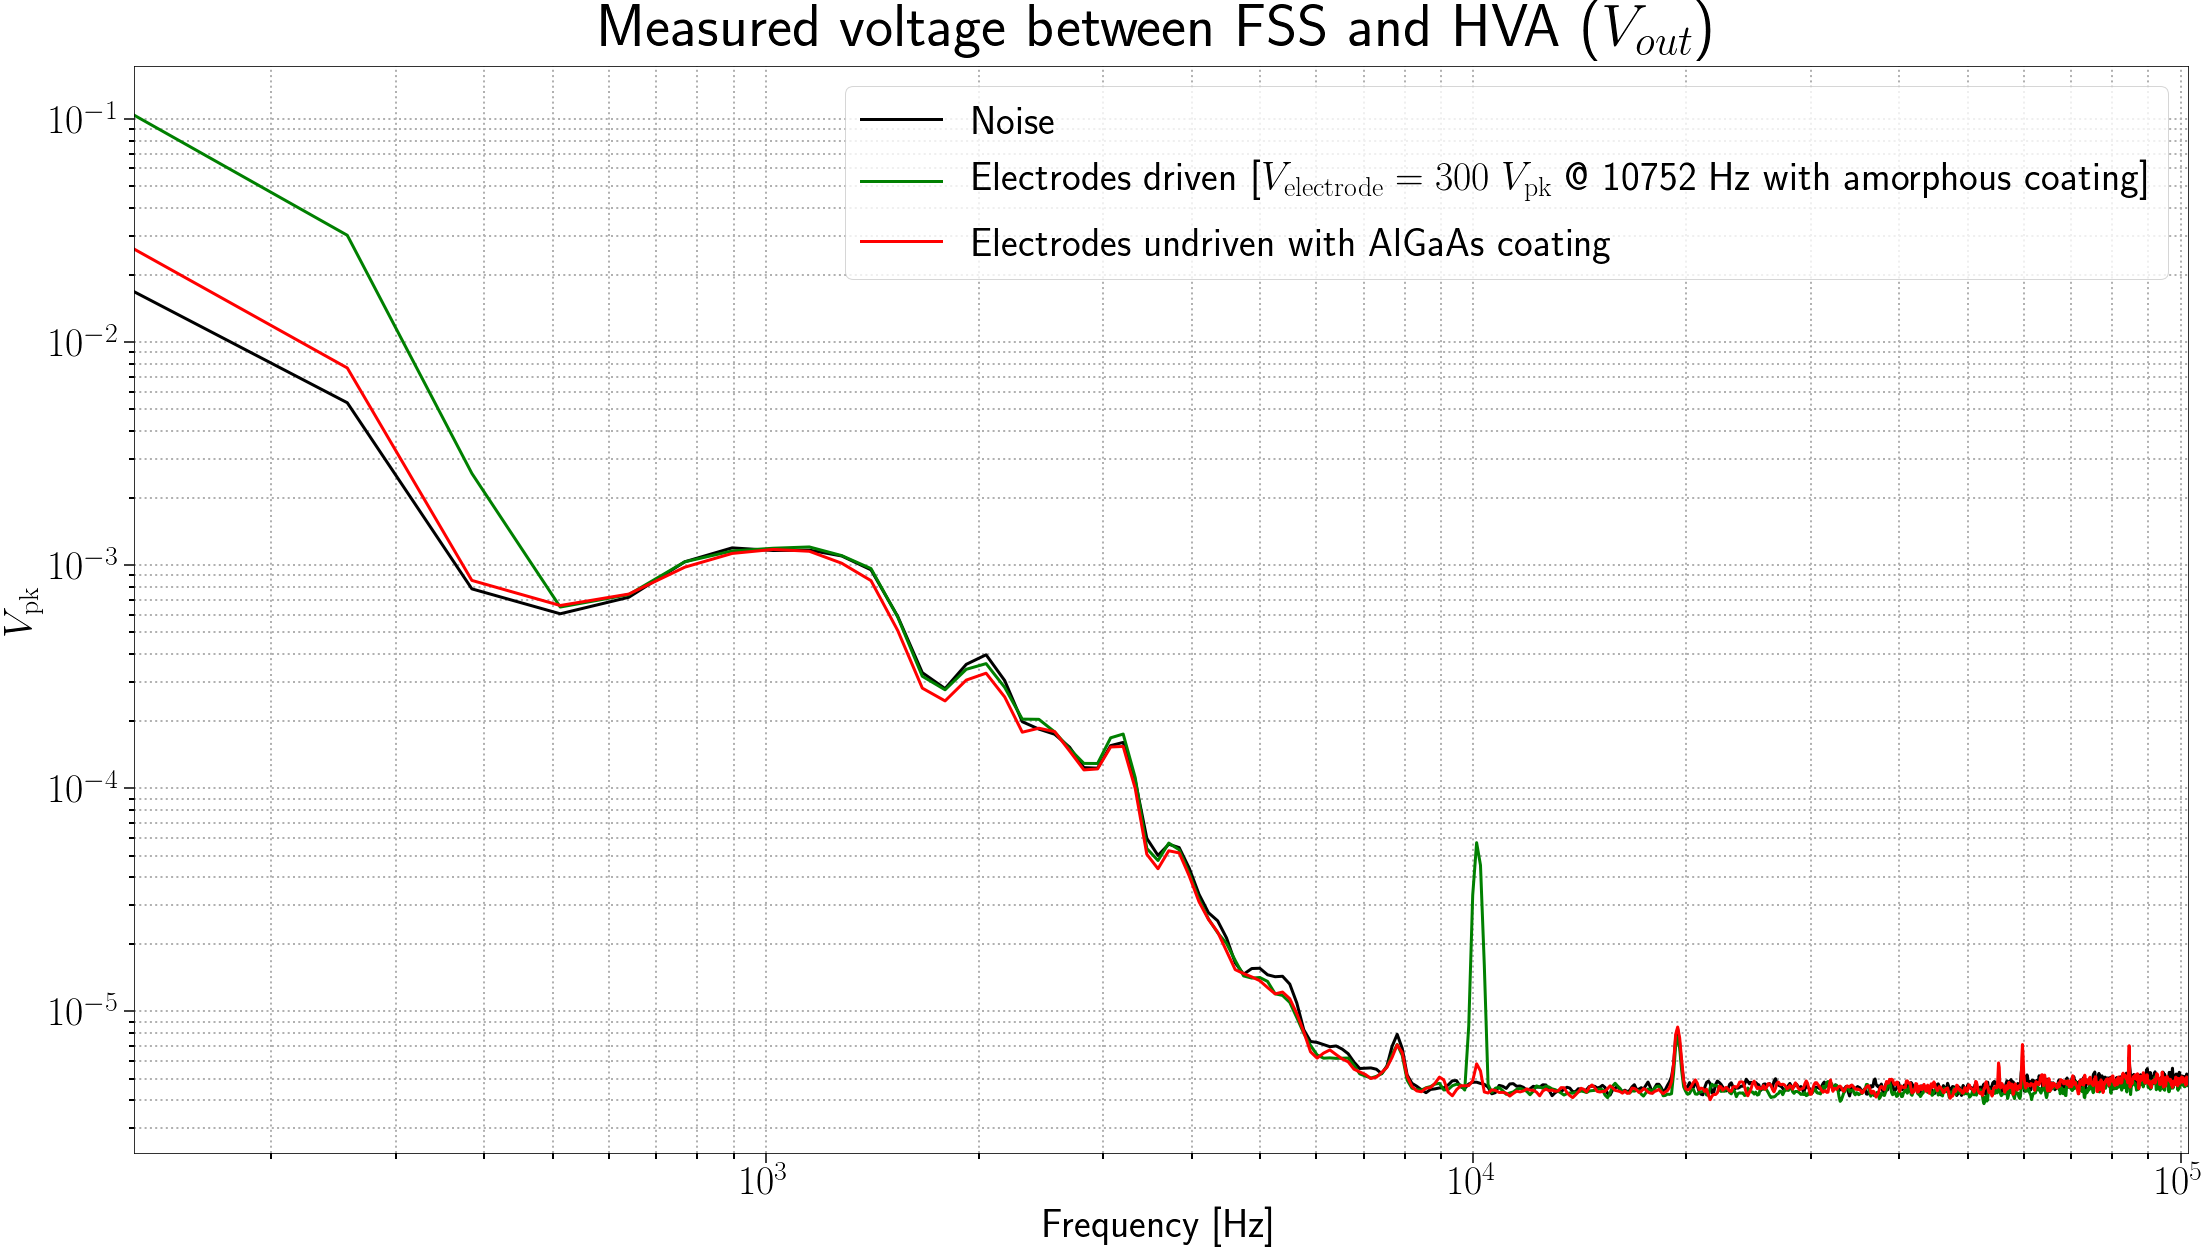

In [55]:
plt.loglog(fn,noise[:,1], color = 'k', label='Noise',linewidth=3)
plt.loglog(fn,driven_connected[:,1], color='g',label='Electrodes driven [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10752 Hz with amorphous coating]', linewidth=3)
plt.loglog(fn,driven_disconnect[:,1],color='r',label='Electrodes undriven with AlGaAs coating', linewidth=3)
plt.xlim([fn[0], fn[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('$$V_{\mathrm{pk}}$$')
plt.title("Measured voltage between FSS and HVA ($V_{out}$)")

In [56]:
nHz = noise[:,1]*abs(cal)
nddHz = driven_disconnect[:,1]*abs(cal)
ndcHz = driven_connected[:,1]*abs(cal)

In [57]:
if compareOLG == True:
    nHz2 = noise[:,1]*abs(cal2)
    nddHz2 = driven_disconnect[:,1]*abs(cal2)
    ndcHz2 = driven_connected[:,1]*abs(cal2)

In [58]:
c = 299792458
lamb =1.064e-6
nu = c/lamb
Lcav = 0.165

# Laser frequency noise spectra

Text(0.5, 1.0, 'Laser frequency noise from measured voltage noise')

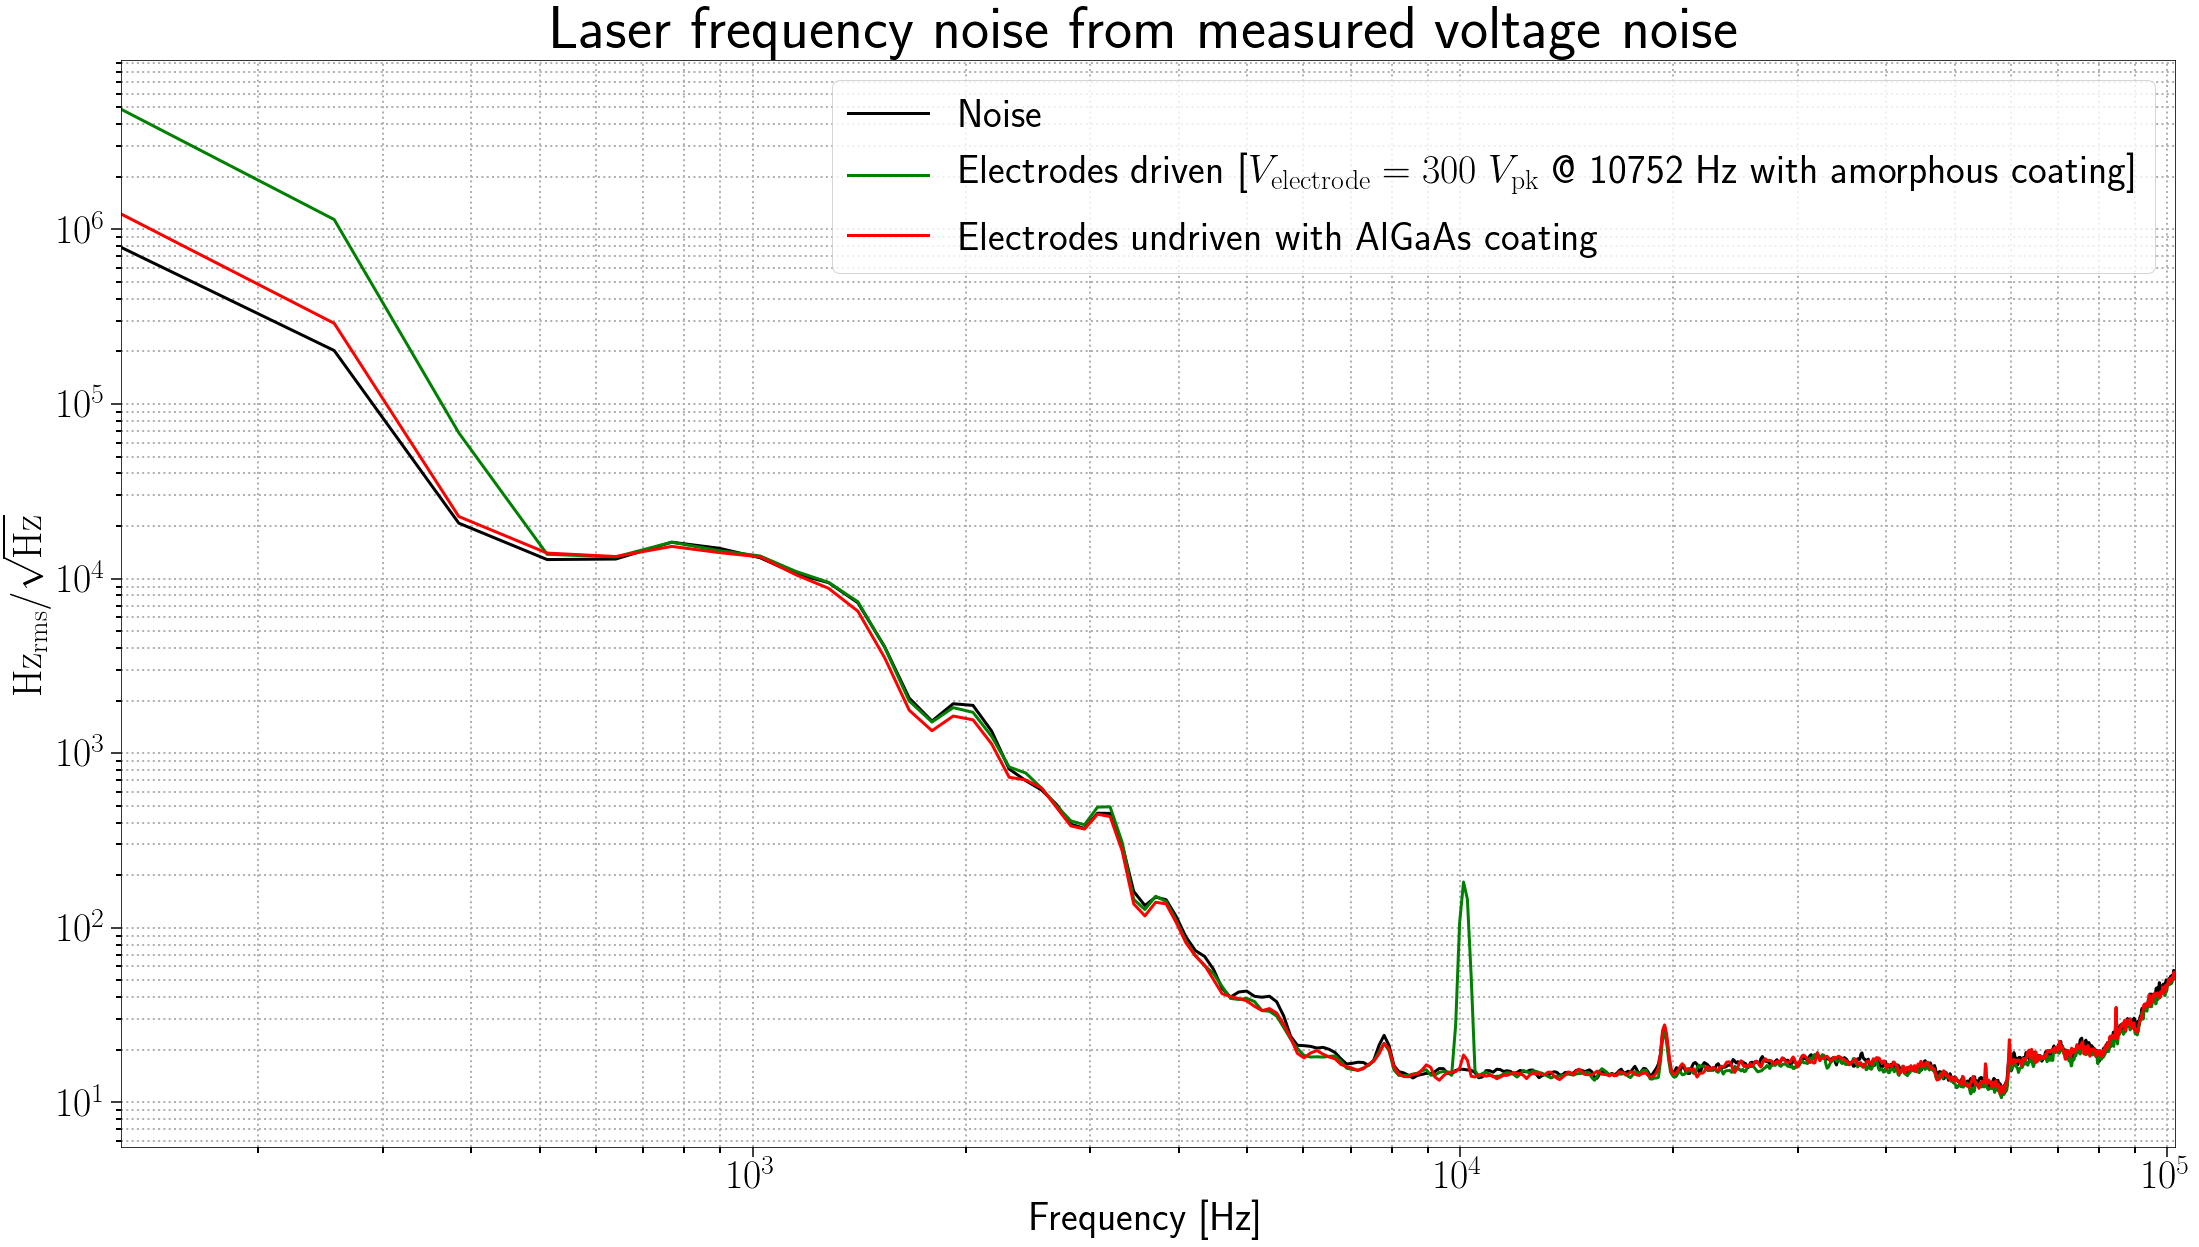

In [59]:
plt.loglog(fn,nHz, color = 'k', label='Noise',linewidth=3)
plt.loglog(fn,ndcHz, color='g',label='Electrodes driven [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10752 Hz with amorphous coating]', linewidth=3)
plt.loglog(fn,nddHz,color='r',label='Electrodes undriven with AlGaAs coating', linewidth=3)
if compareOLG == True:
    plt.loglog(fn,nHz2, label='Noise 2',linewidth=3)
    plt.loglog(fn,ndcHz2, label='Electrodes driven 2 [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10752 Hz with amorphous coating]', linewidth=3)
    plt.loglog(fn,nddHz2,label='Electrodes undriven with AlGaAs coating 2', linewidth=3)
plt.xlim([fn[0], fn[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('$$\mathrm{Hz}_\mathrm{rms}/\sqrt{\mathrm{Hz}}$$')
plt.title("Laser frequency noise from measured voltage noise")

# Displacement noise

## $m_{rms}/\sqrt{Hz}$

Text(0.5, 1.0, 'Displacement noise')

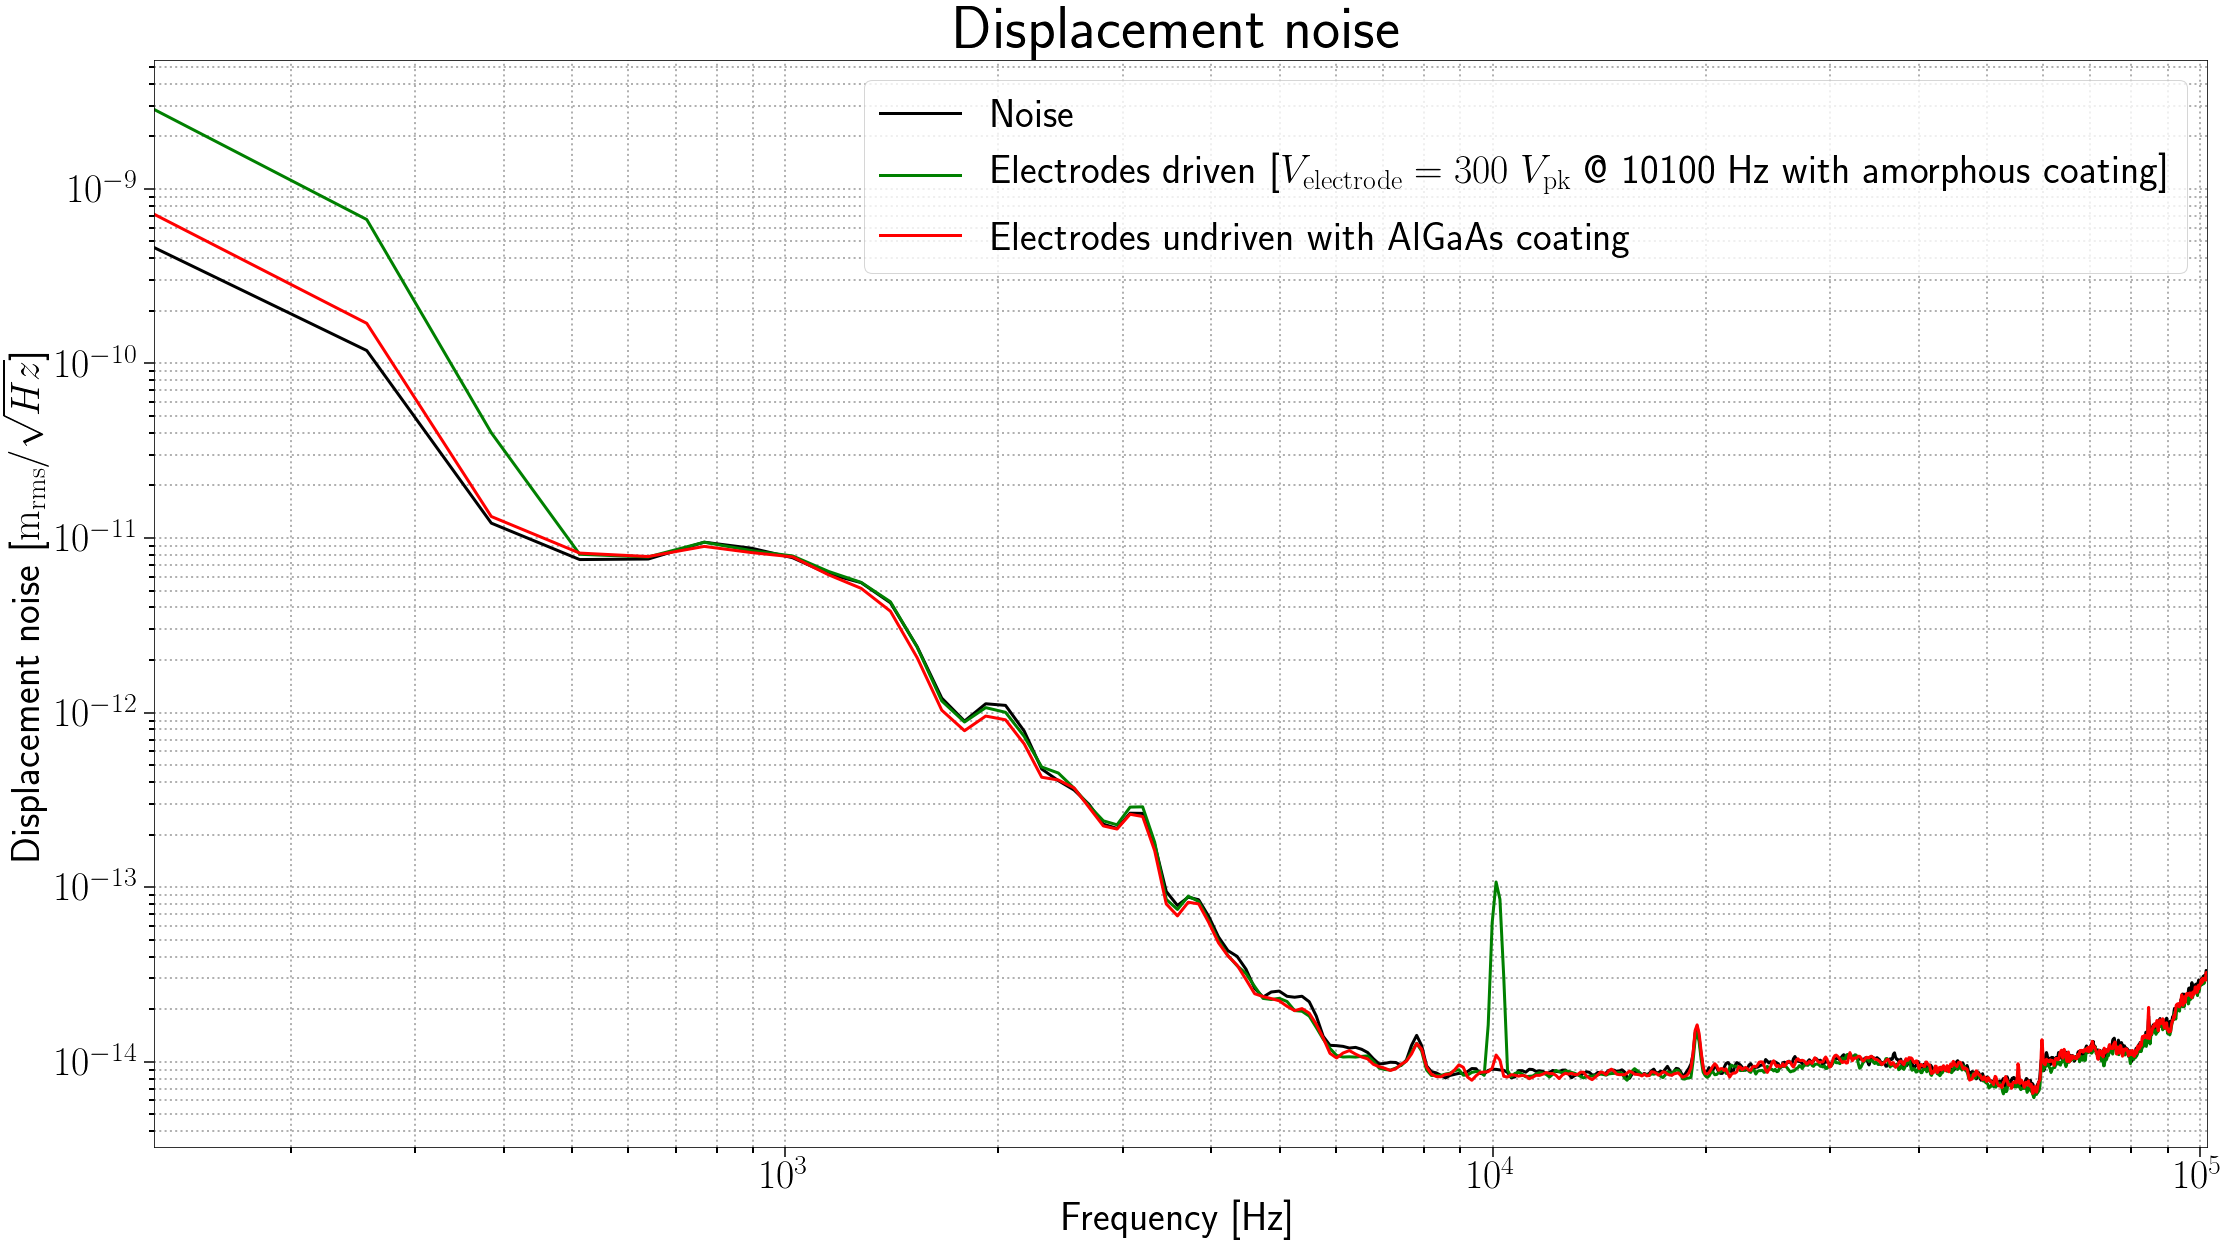

In [60]:
fig = plt.figure()
plt.loglog(fn,nHz*Lcav/nu, color = 'k', label='Noise',linewidth=3)
plt.loglog(fn,ndcHz*Lcav/nu, color='g',label='Electrodes driven [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10100 Hz with amorphous coating]', linewidth=3)
plt.loglog(fn,nddHz*Lcav/nu,color='r',label='Electrodes undriven with AlGaAs coating', linewidth=3)
plt.xlim([fn[0], fn[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement noise [$\mathrm{m}_\mathrm{rms}/\sqrt{Hz}$]')
plt.title("Displacement noise")
#plt.savefig(folder + 'displacement_noise_floor.png',dpi=300,bbox_inches='tight')

## $m_{pk}$

Text(0.5, 1.0, 'Displacement spectra for AlGaAs Electro-optic measurement')

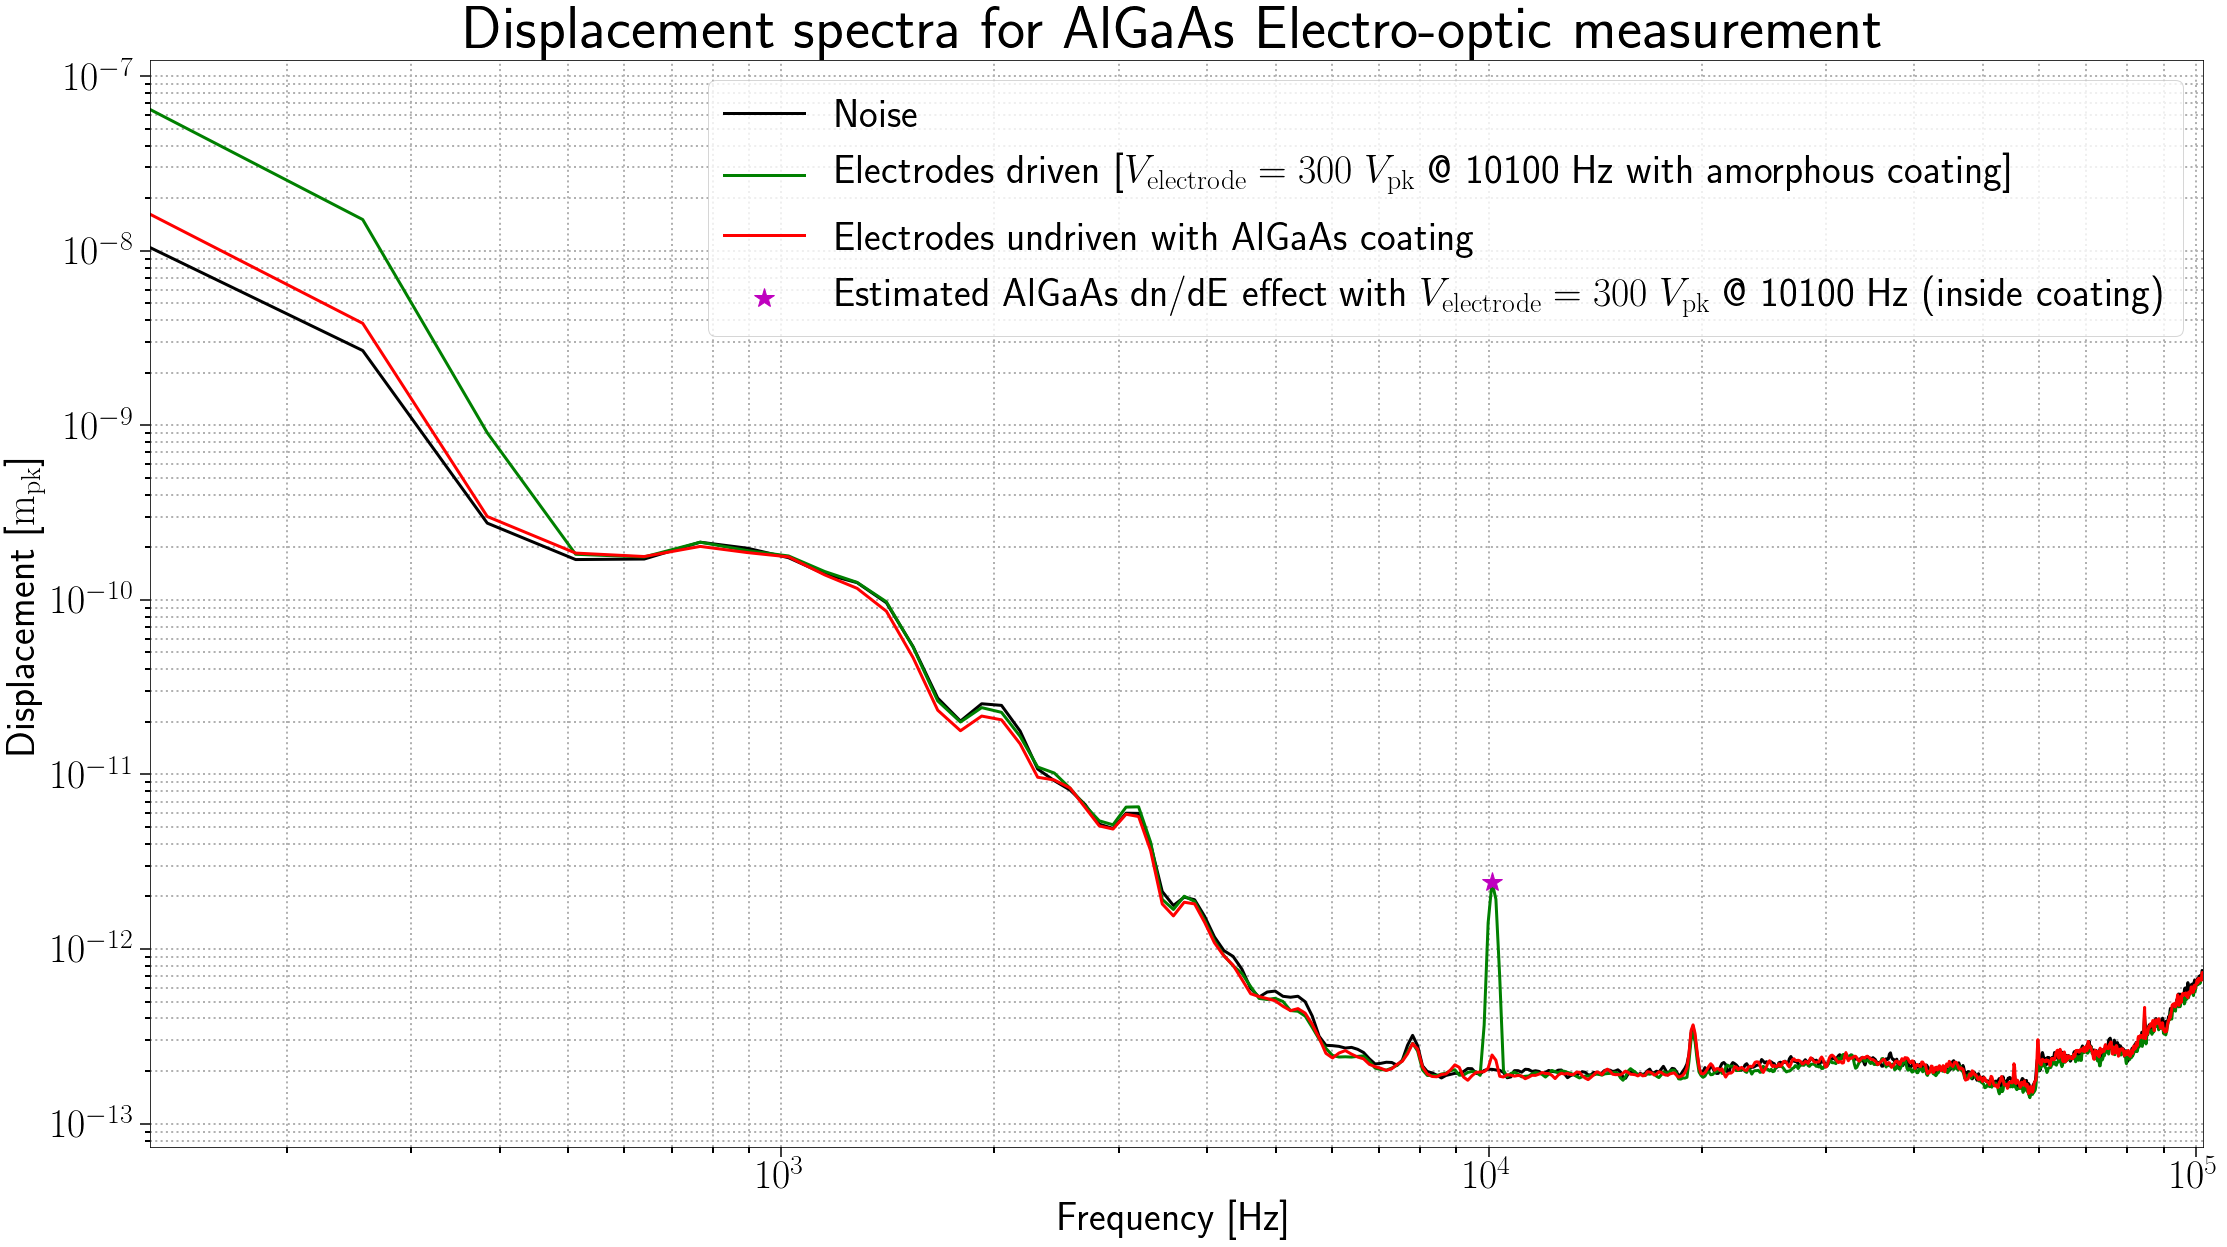

In [62]:
plt.loglog(fn,nHz*Lcav/nu*np.sqrt(2*256), color = 'k', label='Noise',linewidth=3)
plt.loglog(fn,ndcHz*Lcav/nu*np.sqrt(2*256), color='g',label='Electrodes driven [$V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10100 Hz with AlGaAs coating]', linewidth=3)
plt.loglog(fn,nddHz*Lcav/nu*np.sqrt(2*256),color='r',label='Electrodes undriven with AlGaAs coating', linewidth=3)
#plt.loglog(np.array([10000,10000]),3.8e-16*np.array([2500.0,5000.0]), label = 'Estimated EO effect with $V_\mathrm{electrode}= 100 \;V$ and 100 sec integration time',linewidth=8)
plt.loglog(10100,3.8e-16*6350.0 ,'*',color='m', label='Estimated AlGaAs dn/dE effect with $V_\mathrm{electrode}= 300\; V_\mathrm{pk}$ @ 10100 Hz (inside coating)',markersize=20)
#plt.loglog(10000,nHz2[78]*Lcav/nu*10,'o',color='r', label='SNR=10',markersize=15)
plt.xlim([fn[0], fn[-1]])
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Displacement [$\mathrm{m}_\mathrm{pk}$]')
plt.title("Displacement spectra for AlGaAs Electro-optic measurement")
#plt.savefig(folder + 'displacement_electrodes_driven_300V.png',dpi=300,bbox_inches='tight')